In [209]:

#needed to read the saved history and replot 
def load_pkl(target_path):
  df = pd.read_pickle(target_path)
  #needed for debuging
  # df.plot(figsize=(8,5))
  # plt.show()
  return df


#this function is used to save to history to current plot to location
def save_plot_val_accuracy_to_pkl(history, target_path_to_print, out_name):


  df = pd.DataFrame(history.history['val_accuracy'])
  df.plot(figsize=(8,5))
  #needed to save the plt labels of the data
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['val_accuracy'], loc='upper left')


  #necassary to save the file
  df.to_pickle(target_path_to_print + out_name +  "_val_accuracy.pkl")

In [234]:
import os
from re import L

import pandas as pd
import numpy as np
import scipy.stats as stats
import pickle

from matplotlib import pyplot as plt

#connect two histories
# need shape (20,2)
def connect_histories(path):

    np_current = None

    flag_first = 1
 

    for root, directories, file in os.walk(path):


        for file in file:

            if(file.endswith(".pkl")):
                # print(os.path.join(root,file))
                path = os.path.join(root,file)

                # print("debug loading pkl")
                df = load_pkl(path)

                numpy_array_itr_val = df.to_numpy()

                if(flag_first == 1):
                    flag_first = 0
                    np_current = numpy_array_itr_val

                else:

                    np_current = np.concatenate([np_current, numpy_array_itr_val], axis = 1)
                    print((np_current.shape))

        print("finished loop----------------------")

        #need 100,10
        print(np_current.shape)




    return np_current

In [235]:
path_to_maps="/home/robin/pip_workflow/experiment1/results"

numpy_shape_concatenated = connect_histories(path_to_maps)

(100, 2)
(100, 3)
(100, 4)
(100, 5)
(100, 6)
(100, 7)
(100, 8)
(100, 9)
(100, 10)
finished loop----------------------
(100, 10)


In [212]:
# print(numpy_shape_concatenated)


print("--------------mean")
mu1 = numpy_shape_concatenated.mean(axis=1)
print(mu1.size)
print(mu1.shape)



print("------------min")

min1 = numpy_shape_concatenated.min(axis=1)

print(min1.size)
print(min1.shape)

print("------------max")


max1 = numpy_shape_concatenated.max(axis=1)

print(max1.size)
print(max1.shape)

--------------mean
100
(100,)
------------min
100
(100,)
------------max
100
(100,)


(100,)
(100,)


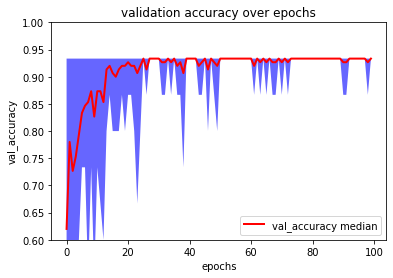

In [227]:


x = np.arange(0,100)
y = np.array(mu1)


min1 = np.array(min1)

max1 = np.array(max1)

print(x.shape)
print(y.shape)



# plt.title("Line graph")
# plt.xlabel("X axis")
# plt.ylabel("Y axis")
# plt.plot(x, y, color ="red")

# plt.plot(x, min1, color="blue")
# plt.plot(x, max1, color="yellow")

fig, ax = plt.subplots(1)

ax.set_ylim([0.6, 1])
ax.plot(x, y, lw=2, label='val_accuracy median', color='red')

ax.set_title(r'validation accuracy over epochs')
ax.legend(loc='lower right')
ax.set_xlabel('epochs')
ax.set_ylabel('val_accuracy')



ax.fill_between(x, min1, max1, facecolor='blue', alpha=0.6)





In [25]:
import pandas as pd
from matplotlib import pyplot as plt


def plot_selected(history_column, column_name, out_path):


  df = history_column
  df.plot(figsize=(8,5))
  plt.title(column_name)
  plt.ylabel(column_name)
  plt.xlabel('epoch')
  plt.legend([column_name], loc='lower right')
  plt.show()






def load_metric_jpg(target_path, out_path):


  history = pd.read_pickle(target_path)


  # print(history.columns)

  for column in history.columns:

    print(column)
    plot_selected(history[column], column, None)



  

  # acc_val_hist.plot(figsize=(8,5))
  # plt.show()

#   df.plot(figsize=(8,5))
#   plt.savefig(out_path + ".jpg")
  return history

loss


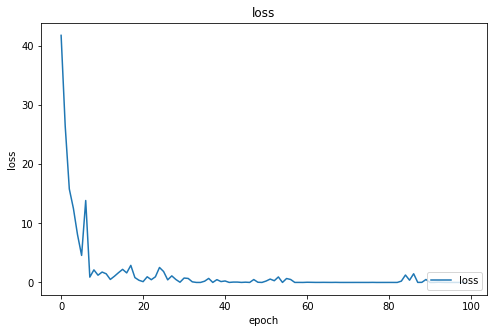

accuracy


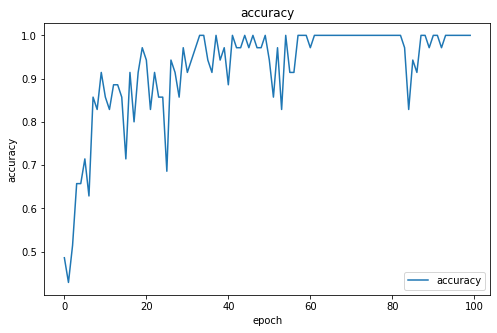

precision


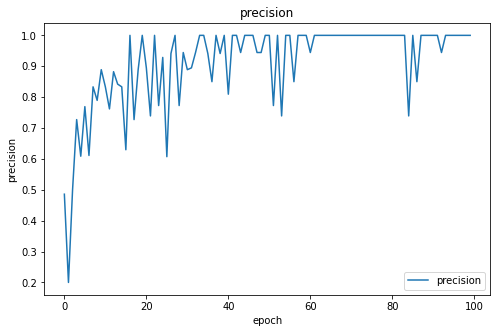

recall


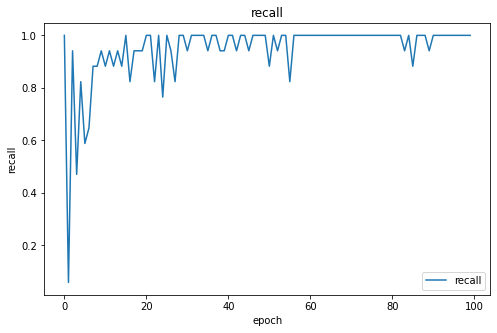

FP


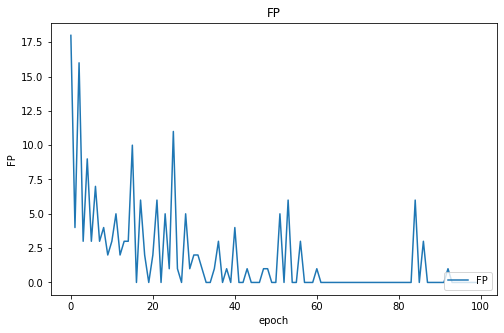

FN


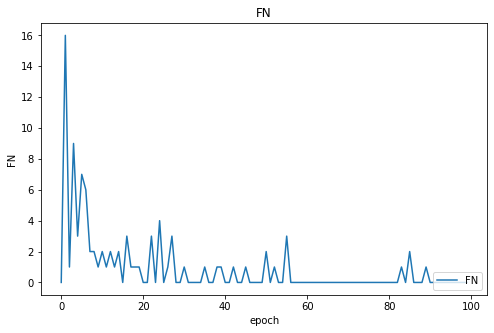

val_loss


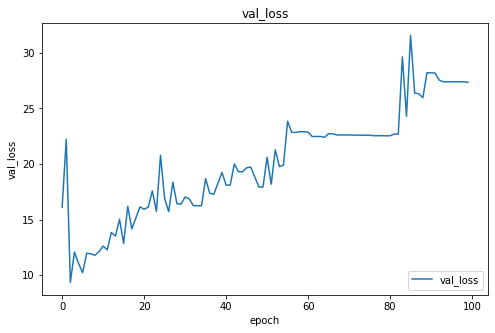

val_accuracy


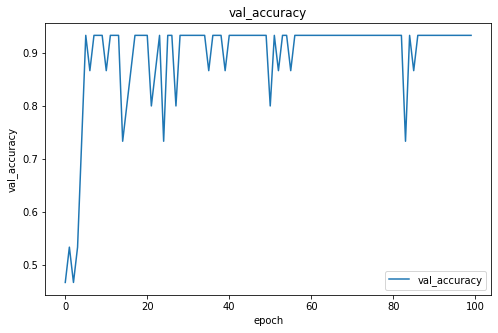

val_precision


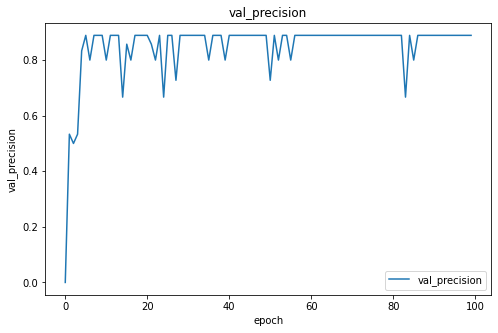

val_recall


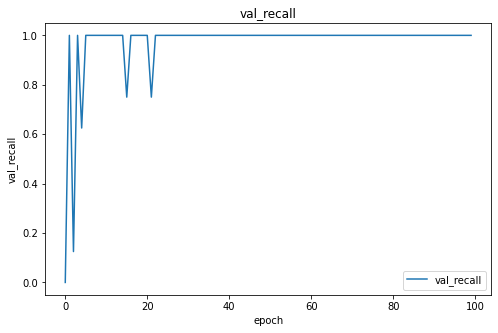

val_FP


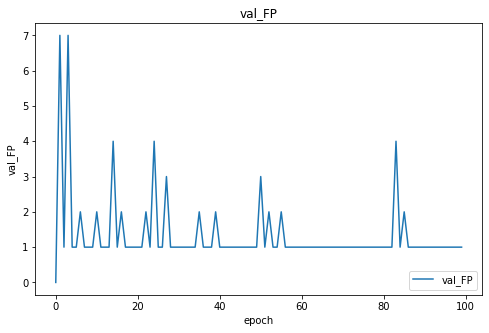

val_FN


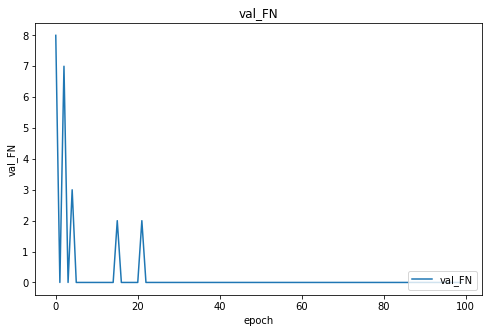

In [26]:

path = "~/pip_workflow/experiment1/results/" + "round1.pkl"

jaja = load_metric_jpg(path, None)

In [1]:
def get_Repr_Array(x_array = 32, y_array = 32):

  #init array with string representation of index
  grid = [[0 for y in range(x_array) ] for x in range(y_array)]
  # grid = [[  str(y) for y in range(x_array) ] for x in range(y_array )]

  return grid

In [7]:
array = get_Repr_Array(8,8)

In [8]:
array[31][31]

IndexError: list index out of range

In [9]:
print(array)

[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]


In [14]:
import ipaddress

def ip_to_int(str_ip):

    return int(ipaddress.IPv4Address(str_ip))



In [15]:
bucket_size = (ip_to_int("255.255.255.255") / 32)

In [16]:
print(bucket_size)

134217727.96875


In [17]:
def get_array_x_index(int_value_ip, buckets = 32.0):

    # float to int conversion? -> should be okey, cause ip is non float value? -> outcomma problem rounded to 131 and 133? todo check
    bucket_size = (ip_to_int("255.255.255.255") / buckets)

    # calculate ip / bucket size -> get index
    index = int_value_ip / bucket_size

    return int(index)

In [18]:
get_array_x_index(67108863)

0

In [19]:
get_array_x_index(210326591)

1

In [20]:
"3.255.255.255" "11.255.255.255"

'3.255.255.25511.255.255.255'

In [24]:
get_array_x_index(ip_to_int("3.255.255.255"))

0

In [23]:
get_array_x_index(ip_to_int("11.255.255.255"))

1

In [25]:

def get_Repr_Array(x_array = 32, y_array = 32):

  #init array with integer value 0
  grid = [[0 for y in range(x_array) ] for x in range(y_array)]

  return grid


repr_array = get_Repr_Array(32,32)

In [26]:
def get_array_y_index_diff_axis(int_value_port, max_ports = 65536, bucket_ammount = 32):

  port_buckets_size = max_ports / bucket_ammount

  #the problem is the row is sort of correct at 0 but since an array is shaped with array 0 being on top
    #we need to put it on row 31 -> calculation is done with real_bucket - buckets in absolut
    # e.g. 0 needs to be 31 -> 0 -31 in abs = 31

  bucket = int(int_value_port / port_buckets_size)
  position_in_array = abs(bucket - bucket_ammount) 

  return position_in_array


def calc_repr_array_resolution(df, source_column, destination_column, MAP_DIMENSION_X, MAP_DIMENSION_Y, MAX_LIMIT_PORTS):


        repr_array = get_Repr_Array(MAP_DIMENSION_X, MAP_DIMENSION_Y)

        for row in df.iterrows():

            source_ip_decimal = row[1][source_column]

            #figure out bucket for x axis
            x_index_for_repr_array = get_array_x_index(source_ip_decimal, MAP_DIMENSION_X)


            dest_port_on_monitor_system = row[1][destination_column]
            y_index_for_repr_array = get_array_y_index_diff_axis(dest_port_on_monitor_system, MAX_LIMIT_PORTS, MAP_DIMENSION_Y)

            
            if(dest_port_on_monitor_system < MAX_LIMIT_PORTS):

                repr_array[y_index_for_repr_array - 1][x_index_for_repr_array - 1] += 1


        return repr_array

In [27]:
repr_array = get_Repr_Array(32, 32)

In [28]:
source_ip_decimal = ip_to_int("3.255.255.255")

In [29]:
x_index_for_repr_array = get_array_x_index(source_ip_decimal, 32)

In [30]:
x_index_for_repr_array

0

In [31]:
dest_port_on_monitor_system = 22
y_index_for_repr_array = get_array_y_index_diff_axis(dest_port_on_monitor_system, 65536, 32)

In [33]:
if(dest_port_on_monitor_system < 65536):

        repr_array[y_index_for_repr_array - 1][x_index_for_repr_array - 1] += 1

In [34]:
repr_array[0][0]

0

In [35]:
y_index_for_repr_array

32

In [36]:
x_index_for_repr_array

0

In [37]:
# repr_array[y_index_for_repr_array - 1][x_index_for_repr_array - 1] += 1

# the x index is the problem!

In [38]:
x_index_for_repr_array - 1

-1

In [39]:
def get_array_x_index(int_value_ip, buckets = 32.0):

    # float to int conversion? -> should be okey, cause ip is non float value? -> outcomma problem rounded to 131 and 133? todo check
    bucket_size = (ip_to_int("255.255.255.255") / buckets)

    # calculate ip / bucket size -> get index
    index = int_value_ip / bucket_size

    return int(index)

In [40]:
get_array_x_index(ip_to_int("255.255.255.255"))

32

In [41]:
def get_array_y_index_diff_axis(int_value_port, max_ports = 65536, bucket_ammount = 32):

  port_buckets_size = max_ports / bucket_ammount

  #the problem is the row is sort of correct at 0 but since an array is shaped with array 0 being on top
    #we need to put it on row 31 -> calculation is done with real_bucket - buckets in absolut
    # e.g. 0 needs to be 31 -> 0 -31 in abs = 31

  bucket = int(int_value_port / port_buckets_size)
  position_in_array = abs(bucket - bucket_ammount) 

  return position_in_array

In [44]:
get_array_y_index_diff_axis(2**16)

0

In [82]:
def get_array_x_index(int_value_ip, buckets = 32.0):


    print("int value ip: " + str(int(int_value_ip)))
    # float to int conversion? 

    bucket_size = (ip_to_int("255.255.255.255") / (buckets - 1))

    print("bucket_size: " + str(int(bucket_size)))


    # calculate ip / bucket size -> get index
    index = int_value_ip / (bucket_size)

    return int(index) 

In [83]:
get_array_x_index(ip_to_int("255.255.255.255"))

int value ip: 4294967295
bucket_size: 138547332


31

In [84]:
get_array_x_index(ip_to_int("240.0.0.0"))

int value ip: 4026531840
bucket_size: 138547332


29

In [85]:
get_array_x_index(ip_to_int("0.0.0.0"))

int value ip: 0
bucket_size: 138547332


0

In [100]:
def get_array_y_index_diff_axis(int_value_port, max_ports = 65536, bucket_ammount = 32):

  port_buckets_size = int(max_ports / (bucket_ammount - 1))

  #the problem is the row is sort of correct at 0 but since an array is shaped with array 0 being on top
    #we need to put it on row 31 -> calculation is done with real_bucket - buckets in absolut
    # e.g. 0 needs to be 31 -> 0 -31 in abs = 31

  bucket = int(int_value_port / port_buckets_size)

  print(bucket)

  position_in_array = abs(bucket - bucket_ammount) 

  return position_in_array

In [101]:
get_array_y_index_diff_axis(2**16)

1

In [102]:
get_array_y_index_diff_axis(0)

32

In [99]:
get_array_y_index_diff_axis(30000)

18

In [4]:
from tensorflow import keras

from keras.utils import plot_model
import sys


model = keras.models.load_model("/home/robin/pip_workflow/8diff_ip_attacks/results/ROUND_2")

2022-09-13 18:27:38.004979: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-09-13 18:27:38.005024: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: debian
2022-09-13 18:27:38.005030: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: debian
2022-09-13 18:27:38.005150: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.129.6
2022-09-13 18:27:38.005176: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.129.6
2022-09-13 18:27:38.005179: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.129.6
2022-09-13 18:27:38.005588: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical ope

In [4]:
import pandas as pd

df = pd.read_csv("~/workspace/MA_Thesis/datasets/CIC2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")




In [9]:
float_val = float(df[[' Flow Duration']].mean(axis=0))
print(float_val)

5379330.607438204


In [17]:
df[[' Flow Duration']].mean(axis=0)

 Flow Duration    5.379331e+06
dtype: float64

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [20]:
df[' Label']

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
286462    BENIGN
286463    BENIGN
286464    BENIGN
286465    BENIGN
286466    BENIGN
Name:  Label, Length: 286467, dtype: object

In [21]:
df[df[' Label'] != "BENIGN"]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1463,80,5021059,6,5,703,1414,356,0,117.166667,181.536131,...,32,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
1467,80,70,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
1468,80,5024211,6,5,703,1414,356,0,117.166667,181.536131,...,32,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
1480,80,52,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
1511,80,5386396,3,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278972,445,6026748,5,3,168,127,168,0,33.600000,75.131884,...,32,596.0,0.0,596,596,6006327.0,0.0,6006327,6006327,PortScan
278973,80,6007698,3,6,18,11595,18,0,6.000000,10.392305,...,32,606.0,0.0,606,606,6006317.0,0.0,6006317,6006317,PortScan
278974,139,8439702,4,2,18,0,18,0,4.500000,9.000000,...,32,598.0,0.0,598,598,6006325.0,0.0,6006325,6006325,PortScan
278984,2000,57,1,1,0,6,0,0,0.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan


In [23]:


portscanDF = df[df[' Label'] == "PortScan"]

In [25]:
columFLows = portscanDF[" Flow Duration"]

In [26]:
columFLows.mean()

82820.22837098094

In [27]:
82820.22837098094 / 60

1380.337139516349

In [28]:
82820.22837098094 / 60 / 60

23.00561899193915

In [29]:
df = pd.read_csv("~/workspace/MA_Thesis/datasets/CIC2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")

In [31]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [1]:
from keras import *

import tensorflow as tf

tf.keras.losses.mean_squared_error(tf.ones((2, 2,)), tf.zeros((2, 2)))


2022-10-24 14:13:30.843905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-24 14:13:30.843920: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-24 14:13:36.127056: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-10-24 14:13:36.127098: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: debian
2022-10-24 14:13:36.127108: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: debian
2022-10-24 14:13:36.127217: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.129.6
2022-10-24 14:13:36.127247: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel report

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>

In [2]:
tf.ones((2, 2,))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [3]:
tf.zeros((2, 2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [2]:
import pandas as pd

df = pd.read_csv("~/workspace/MA_Thesis/datasets/CIC2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")

In [4]:
avergae =df[[' Flow Duration']].mean(axis=0)

In [5]:
avergaesecs = avergae / 100000

In [6]:
avergaesecs

 Flow Duration    53.793306
dtype: float64

In [8]:
5379330 / 1000000

5.37933

In [1]:

import numpy as np
import pandas as pd
from pickle import *
import sys
import os

from matplotlib import pyplot as plt


def load_pkl(target_path):
  df = pd.read_pickle(target_path)

#needed for debuging
  # df.plot(figsize=(8,5))
  # plt.show()
  return df



def sort(lst):

  lst.sort(key = str)
  return lst


#function needed to prepare plot from multiple histories:
#it returns a numpy shape of format:
#
def connect_histories(path, metric_name_in_df):

    np_current = None

    flag_first = 1

    counter = 0

    list_of_paths = os.listdir(path)

    new_list = [item for item in list_of_paths if (".pkl" in item)]

    sorted_files = sorted(new_list,key=lambda x: float(x.replace("ROUND_1exposure_time_", "").replace("seconds.pkl", "")))

    # sorted_files = sorted(new_list,key=lambda x: int(os.path.splitext(x)[0]))

    # print(sorted_files)


    for file in sorted_files:



        compl_path = path + file
        print(compl_path)
        counter = counter + 1
        history = load_pkl(compl_path)
        df = history[metric_name_in_df].to_frame() 

        numpy_array_itr_val = df.to_numpy()

        if(flag_first == 1):
          flag_first = 0
          np_current = numpy_array_itr_val

        else:
          np_current = np.concatenate([np_current, numpy_array_itr_val], axis = 1)
          # print((np_current.shape))


    return np_current


def plot_control_line(range, color):

  # print(np.shape(max1))
  ctrl_line = np.ones((22,))

  x_axis = range

  plt.plot(x_axis, ctrl_line, color=color, label="1.0", linestyle='--')

  return plt







def plot_on_plt(plt, numpy_array, metric_name, range, color):

  max1 = np.array(numpy_array.max(axis=0))

  x_axis = range

  # plt.figure(facecolor='white')
  plt.plot(x_axis, max1, color=color, label=metric_name)


  return plt



def plot_one_subplot():

  return 0

#--------------------------------------------running code----------------

PATH_TO_HISTORIES = "~/Desktop/1experiment1_plotting/histories_only_renamed_in_order/exposure_time/"


# OUT_PATH = str(sys.argv[2])





np_shape_of_histories = connect_histories(PATH_TO_HISTORIES, "val_accuracy")


range1 = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']

range2 = ['1', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60']


compl_range = range1 + range2

# plt.subplots(1) 



fig = plt.figure(figsize=(30, 13))

#for 3 plots
widthEach = 40
xytickFontsize=23
labelsize=35
legendsize=40

np_shape_of_histories_acc = connect_histories(PATH_TO_HISTORIES, "val_accuracy")
np_shape_of_histories_prec = connect_histories(PATH_TO_HISTORIES, "val_precision")
np_shape_of_histories_recall = connect_histories(PATH_TO_HISTORIES, "val_recall")





#----------------------------------------------------------------------------------------------------

max1 = np.array(np_shape_of_histories_acc.max(axis=0))


x = compl_range
y = max1


plt.subplot(1, 3, 1)
fig.set_figwidth(widthEach)

plt.ylim([0.85, 1.01])

plt.xticks(fontsize=xytickFontsize,  rotation=45)
plt.yticks(fontsize=xytickFontsize)

plt.ylabel("Accuracy", fontsize=labelsize)
#  fontsize=14)
plt.xlabel("Exposure Times in Seconds", fontsize=labelsize)
# plt.title("Different Exposure Times")

ctrl_line = np.ones((22,))

x_axis = compl_range

plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')



plt.plot(x,y, label="Accuracy Maximum", color="red")
plt.legend(loc="lower right",  prop={'size': legendsize})



#----------------------------------------------------------------------------------------------------

plt.subplot(1, 3, 2)
fig.set_figwidth(widthEach)
max2 = np.array(np_shape_of_histories_prec.max(axis=0))


x = compl_range
y = max2


plt.ylim([0.85, 1.01])

plt.xticks(fontsize=xytickFontsize, rotation=45)
plt.yticks(fontsize=xytickFontsize)

plt.ylabel("Precision", fontsize=labelsize)
#  fontsize=14)
plt.xlabel("Exposure Times in Seconds", fontsize=labelsize)
# plt.title("Different Exposure Times")

ctrl_line = np.ones((22,))

x_axis = compl_range

plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')



plt.plot(x,y, label="Precision Maximum", color="Green")

plt.legend(loc="lower right",  prop={'size': legendsize})

#----------------------------------------------------------------------------------------------------


plt.subplot(1, 3, 3)
fig.set_figwidth(widthEach)
max3 = np.array(np_shape_of_histories_recall.max(axis=0))


x = compl_range
y = max3


plt.ylim([0.85, 1.01])

plt.xticks(fontsize=xytickFontsize,  rotation=45)
plt.yticks(fontsize=xytickFontsize)

plt.ylabel("Recall", fontsize=labelsize)
#  fontsize=14)
plt.xlabel("Exposure Times in Seconds", fontsize=labelsize)
# plt.title("Different Exposure Times")

ctrl_line = np.ones((22,))

x_axis = compl_range

plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')

plt.plot(x,y, label="Recall Maximum", color="Blue")
plt.legend(loc="lower right",  prop={'size': legendsize})






plt.savefig(str(PATH_TO_HISTORIES) + "exp_time_plots.png", bbox_inches="tight", pad_inches=0.1, dpi=100)
plt.show()




FileNotFoundError: [Errno 2] No such file or directory: '--ip=127.0.0.1'

Found : 10 histories
Found : 10 histories


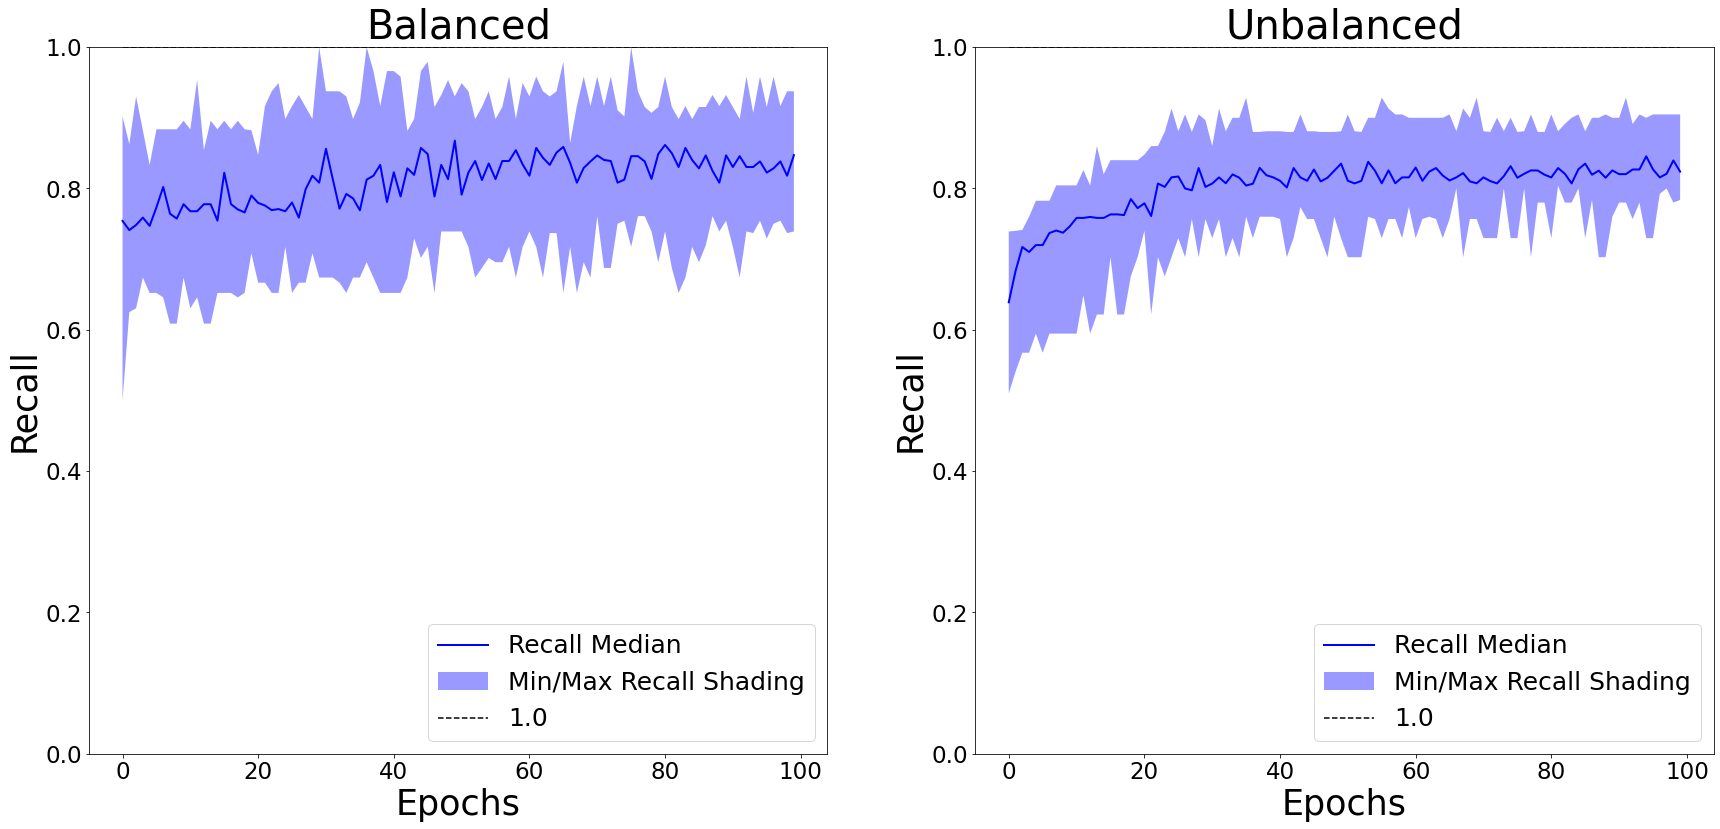

maximum false positive rate
0.9285714030265808


In [11]:

import numpy as np
import pandas as pd
from pickle import *
import sys
import os

from matplotlib import pyplot as plt


def load_pkl(target_path):
  df = pd.read_pickle(target_path)

#needed for debuging
  # df.plot(figsize=(8,5))
  # plt.show()
  return df

def connect_histories(path, metric_name_in_df):

    np_current = None

    flag_first = 1

    counter = 0
 

    for root, directories, file in os.walk(path):


        for file in file:

            if(file.endswith(".pkl")):
                # print(os.path.join(root,file))
                path = os.path.join(root,file)
                #order does not matter?!
                # in every no matter which order red pkl it gets order from the epoch
                counter = counter + 1

                # print("debug loading pkl")
                history = load_pkl(path)

                #a column is imported as a series logic below forces dataframes!
                df = history[metric_name_in_df].to_frame()               

                numpy_array_itr_val = df.to_numpy()

                if(flag_first == 1):
                    flag_first = 0
                    np_current = numpy_array_itr_val

                else:

                    np_current = np.concatenate([np_current, numpy_array_itr_val], axis = 1)
                    # print((np_current.shape))

    # print("finished loop----------------------")

    #     #need epochs,learning_runs
    # print(np_current.shape)

    print("Found : " + str(counter) + " histories")


    return np_current


def calc_fnr_on_epochs(np_shape_fn, np_shape_tp, epochs):


  column_list = []

  # fn_val_in_epoch_i = np_shape_fn[0]
  # tp_val_in_epoch_i = np_shape_tp[0]

  # # print(np_shape_fn[0])
  # # print(np_shape_tp[0])

  # rate = fn_val_in_epoch_i / (fn_val_in_epoch_i + tp_val_in_epoch_i)
  # # print("rate")
  # # print(rate)

  for i in range(epochs):

    fn_val_in_epoch_i = np_shape_fn[i]
    tp_val_in_epoch_i = np_shape_tp[i]

    column_list.append(fn_val_in_epoch_i / (fn_val_in_epoch_i + tp_val_in_epoch_i))

  return np.array(column_list)

# function needed to calculate array (vecot wise) the false positives rates
#input shapes need to be identical
def calc_fpr_on_epochs(np_shape_fp, np_shape_tn, epochs):

  list = []

  for i in range(epochs):

    fp_val_in_epoch_i = np_shape_fp[i]
    tp_val_in_epoch_i = np_shape_tn[i]

    list.append(fp_val_in_epoch_i / (fp_val_in_epoch_i + tp_val_in_epoch_i))

  return np.array(list)
#--------------------------------------------running code----------------


# config: 

all_ylim=[0.0,1.0]


fig = plt.figure(figsize=(30, 13), facecolor='white')


widthEach = 45
xytickFontsize=23
labelsize=35
legendsize=25
pad_inches=0.1



PATH_TO_HISTORIES_BAL = "/home/robin/Desktop/on_pc_results_CIC/CICsectionBal/CIC17501830/"


PATH_TO_HISTORIES_UNBAL = "/home/robin/Desktop/on_pc_results_CIC/CICsectionUnbal/results/"

plt.subplot(1, 3, 1)
fig.set_figwidth(widthEach)

np_shape_of_histories = connect_histories(PATH_TO_HISTORIES_BAL, "val_recall")


median = np.array(np.median(np_shape_of_histories, axis=1))
min1 = np.array(np_shape_of_histories.min(axis=1))
max1 = np.array(np_shape_of_histories.max(axis=1))

x_axis = np.arange(0,100)


plt.ylim(all_ylim)
plt.xticks(fontsize=xytickFontsize)
plt.yticks(fontsize=xytickFontsize)

plt.plot(x_axis, median, lw=2, label="Recall Median", color='blue')
plt.fill_between(x_axis, min1, max1, facecolor='blue', label="Min/Max Recall Shading", alpha=0.4)

ctrl_line = np.ones((100,))
plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')

# ax.set_title('Median of ' + metric_name.upper() + " over " + str(epochs) + " epochs")
plt.legend(loc='lower right', prop={'size': legendsize})
plt.title("Balanced", size=40)
plt.xlabel('Epochs', fontsize=labelsize)
plt.ylabel("Recall", fontsize=labelsize)



#----------------------------------------------------------------------------------------------------

plt.subplot(1, 3, 2)

fig.set_figwidth(widthEach)

np_shape_of_histories = connect_histories(PATH_TO_HISTORIES_UNBAL, "val_recall")


median = np.array(np.median(np_shape_of_histories, axis=1))
min1 = np.array(np_shape_of_histories.min(axis=1))
max1 = np.array(np_shape_of_histories.max(axis=1))

x_axis = np.arange(0,100)


plt.ylim(all_ylim)
plt.xticks(fontsize=xytickFontsize)
plt.yticks(fontsize=xytickFontsize)

plt.plot(x_axis, median, lw=2, label="Recall Median", color='blue')
plt.fill_between(x_axis, min1, max1, facecolor='blue', label="Min/Max Recall Shading", alpha=0.4)

ctrl_line = np.ones((100,))
plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')

# ax.set_title('Median of ' + metric_name.upper() + " over " + str(epochs) + " epochs")
plt.legend(loc='lower right', prop={'size': legendsize})
plt.title("Unbalanced", size=40)
plt.xlabel('Epochs', fontsize=labelsize)
plt.ylabel("Recall", fontsize=labelsize)


plt.savefig("/home/robin/Desktop/on_pc_results_CIC/" + "compRec.png",pad_inches=pad_inches, bbox_inches="tight")

plt.show() 

print("maximum false positive rate")
print(max1.max())



Found : 10 histories
Found : 10 histories
Found : 10 histories
Found : 10 histories


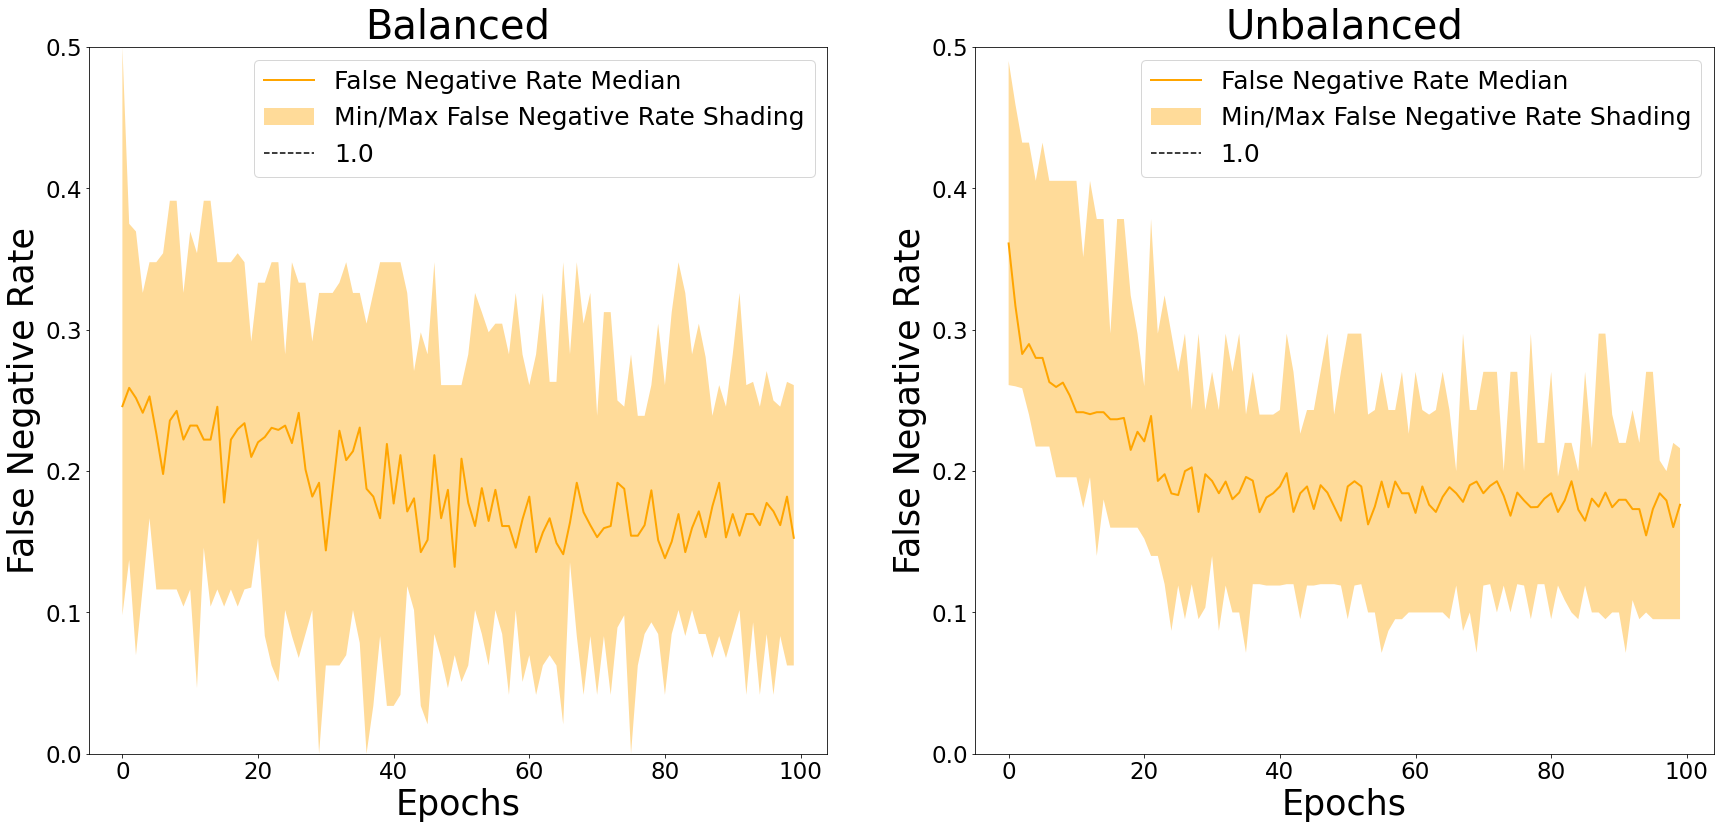

maximum false positive rate
0.49019607843137253


In [15]:

import numpy as np
import pandas as pd
from pickle import *
import sys
import os

from matplotlib import pyplot as plt


def load_pkl(target_path):
  df = pd.read_pickle(target_path)

#needed for debuging
  # df.plot(figsize=(8,5))
  # plt.show()
  return df

def connect_histories(path, metric_name_in_df):

    np_current = None

    flag_first = 1

    counter = 0
 

    for root, directories, file in os.walk(path):


        for file in file:

            if(file.endswith(".pkl")):
                # print(os.path.join(root,file))
                path = os.path.join(root,file)
                #order does not matter?!
                # in every no matter which order red pkl it gets order from the epoch
                counter = counter + 1

                # print("debug loading pkl")
                history = load_pkl(path)

                #a column is imported as a series logic below forces dataframes!
                df = history[metric_name_in_df].to_frame()               

                numpy_array_itr_val = df.to_numpy()

                if(flag_first == 1):
                    flag_first = 0
                    np_current = numpy_array_itr_val

                else:

                    np_current = np.concatenate([np_current, numpy_array_itr_val], axis = 1)
                    # print((np_current.shape))

    # print("finished loop----------------------")

    #     #need epochs,learning_runs
    # print(np_current.shape)

    print("Found : " + str(counter) + " histories")


    return np_current


def calc_fnr_on_epochs(np_shape_fn, np_shape_tp, epochs):


  column_list = []

  # fn_val_in_epoch_i = np_shape_fn[0]
  # tp_val_in_epoch_i = np_shape_tp[0]

  # # print(np_shape_fn[0])
  # # print(np_shape_tp[0])

  # rate = fn_val_in_epoch_i / (fn_val_in_epoch_i + tp_val_in_epoch_i)
  # # print("rate")
  # # print(rate)

  for i in range(epochs):

    fn_val_in_epoch_i = np_shape_fn[i]
    tp_val_in_epoch_i = np_shape_tp[i]

    column_list.append(fn_val_in_epoch_i / (fn_val_in_epoch_i + tp_val_in_epoch_i))

  return np.array(column_list)

# function needed to calculate array (vecot wise) the false positives rates
#input shapes need to be identical
def calc_fpr_on_epochs(np_shape_fp, np_shape_tn, epochs):

  list = []

  for i in range(epochs):

    fp_val_in_epoch_i = np_shape_fp[i]
    tp_val_in_epoch_i = np_shape_tn[i]

    list.append(fp_val_in_epoch_i / (fp_val_in_epoch_i + tp_val_in_epoch_i))

  return np.array(list)

# function needed to calculate array (vecot wise) the false positives rates
#input shapes need to be identical
def calc_fpr_on_epochs(np_shape_fp, np_shape_tn, epochs):

  list = []

  for i in range(epochs):

    fp_val_in_epoch_i = np_shape_fp[i]
    tp_val_in_epoch_i = np_shape_tn[i]

    list.append(fp_val_in_epoch_i / (fp_val_in_epoch_i + tp_val_in_epoch_i))

  return np.array(list)

#--------------------------------------------running code----------------


# config: 

all_ylim=[0.0,0.5]


fig = plt.figure(figsize=(30, 13), facecolor='white')


widthEach = 45
xytickFontsize=23
labelsize=35
legendsize=25
pad_inches=0.1



PATH_TO_HISTORIES_BAL = "/home/robin/Desktop/on_pc_results_CIC/CICsectionBal/CIC17501830/"


PATH_TO_HISTORIES_UNBAL = "/home/robin/Desktop/on_pc_results_CIC/CICsectionUnbal/results/"

plt.subplot(1, 3, 1)
fig.set_figwidth(widthEach)

np_shape_of_histories_FN = connect_histories(PATH_TO_HISTORIES_BAL, "val_FN")
np_shape_of_histories_TP = connect_histories(PATH_TO_HISTORIES_BAL, "val_TP")


np_fnr = calc_fnr_on_epochs(np_shape_of_histories_FN, np_shape_of_histories_TP, 100)


median = np.array(np.median(np_fnr, axis=1))
min1 = np.array(np_fnr.min(axis=1))
max1 = np.array(np_fnr.max(axis=1))

x_axis = np.arange(0,100)


plt.ylim(all_ylim)
plt.xticks(fontsize=xytickFontsize)
plt.yticks(fontsize=xytickFontsize)

plt.plot(x_axis, median, lw=2, label="False Negative Rate Median", color='orange')
plt.fill_between(x_axis, min1, max1, facecolor='orange', label="Min/Max False Negative Rate Shading", alpha=0.4)

ctrl_line = np.ones((100,))
plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')

# ax.set_title('Median of ' + metric_name.upper() + " over " + str(epochs) + " epochs")
plt.legend(loc='upper right', prop={'size': legendsize})
plt.title("Balanced", size=40)
plt.xlabel('Epochs', fontsize=labelsize)
plt.ylabel("False Negative Rate", fontsize=labelsize)



#----------------------------------------------------------------------------------------------------

plt.subplot(1, 3, 2)

fig.set_figwidth(widthEach)

np_shape_of_histories_FN = connect_histories(PATH_TO_HISTORIES_UNBAL, "val_FN")
np_shape_of_histories_TP = connect_histories(PATH_TO_HISTORIES_UNBAL, "val_TP")


np_fnr = calc_fnr_on_epochs(np_shape_of_histories_FN, np_shape_of_histories_TP, 100)


median = np.array(np.median(np_fnr, axis=1))
min1 = np.array(np_fnr.min(axis=1))
max1 = np.array(np_fnr.max(axis=1))


x_axis = np.arange(0,100)


plt.ylim(all_ylim)
plt.xticks(fontsize=xytickFontsize)
plt.yticks(fontsize=xytickFontsize)

plt.plot(x_axis, median, lw=2, label="False Negative Rate Median", color='orange')
plt.fill_between(x_axis, min1, max1, facecolor='orange', label="Min/Max False Negative Rate Shading", alpha=0.4)

ctrl_line = np.ones((100,))
plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')

# ax.set_title('Median of ' + metric_name.upper() + " over " + str(epochs) + " epochs")
plt.legend(loc='upper right', prop={'size': legendsize})
plt.title("Unbalanced", size=40)
plt.xlabel('Epochs', fontsize=labelsize)
plt.ylabel("False Negative Rate", fontsize=labelsize)


plt.savefig("/home/robin/Desktop/on_pc_results_CIC/" + "fnrCompare.png",pad_inches=pad_inches, bbox_inches="tight")

plt.show() 

print("maximum false positive rate")
print(max1.max())



Found : 10 histories
Found : 10 histories
Found : 10 histories
Found : 10 histories


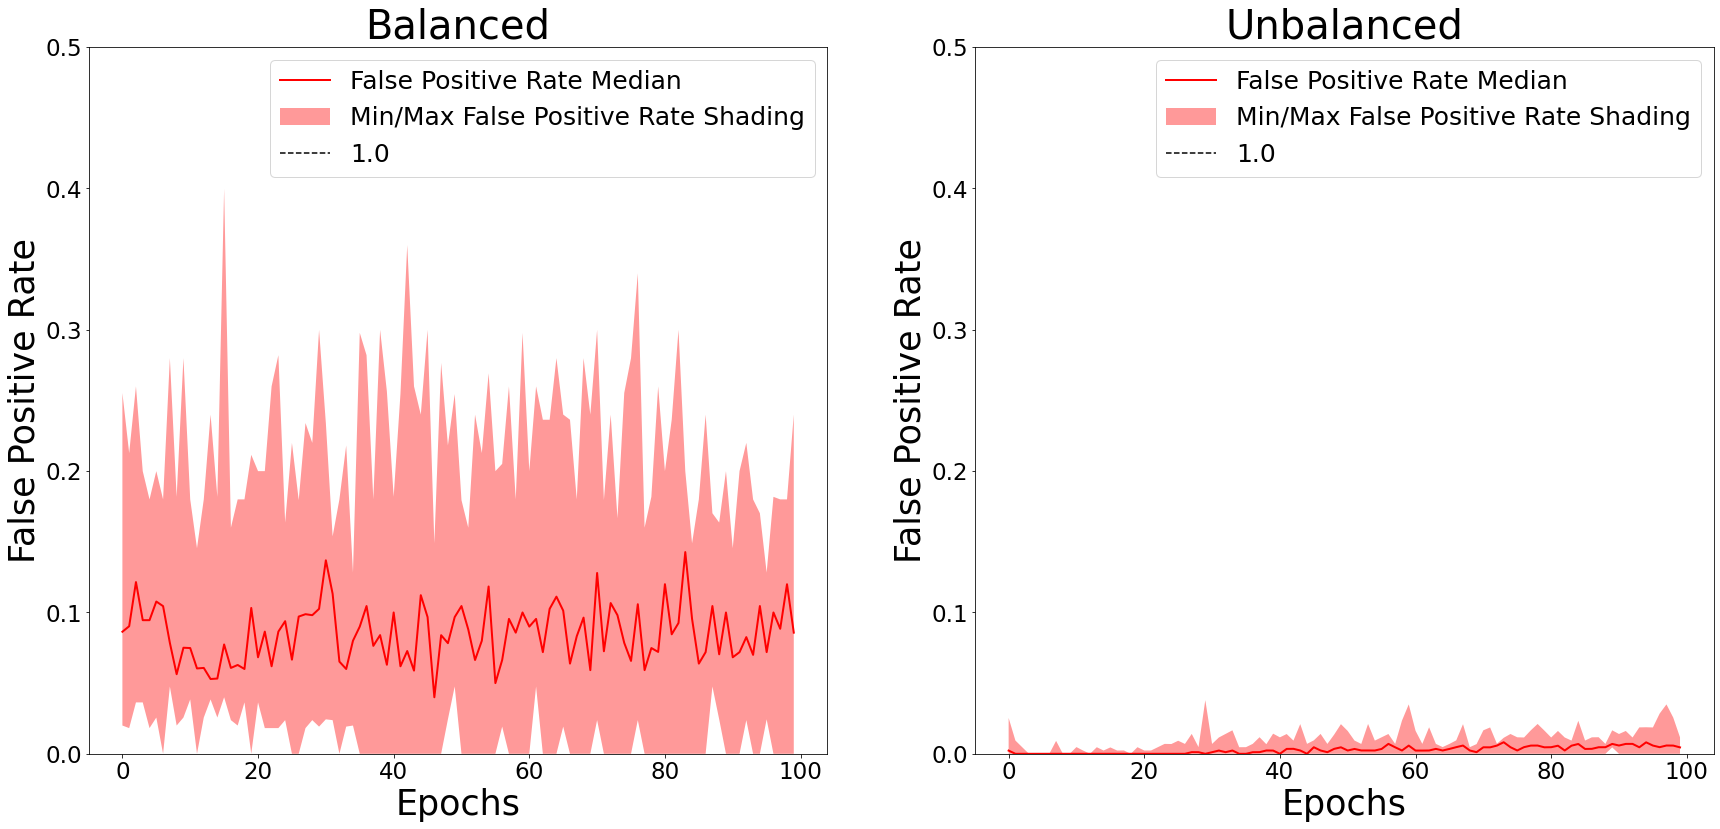

maximum false positive rate
0.03800475059382423


In [19]:

import numpy as np
import pandas as pd
from pickle import *
import sys
import os

from matplotlib import pyplot as plt


def load_pkl(target_path):
  df = pd.read_pickle(target_path)

#needed for debuging
  # df.plot(figsize=(8,5))
  # plt.show()
  return df

def connect_histories(path, metric_name_in_df):

    np_current = None

    flag_first = 1

    counter = 0
 

    for root, directories, file in os.walk(path):


        for file in file:

            if(file.endswith(".pkl")):
                # print(os.path.join(root,file))
                path = os.path.join(root,file)
                #order does not matter?!
                # in every no matter which order red pkl it gets order from the epoch
                counter = counter + 1

                # print("debug loading pkl")
                history = load_pkl(path)

                #a column is imported as a series logic below forces dataframes!
                df = history[metric_name_in_df].to_frame()               

                numpy_array_itr_val = df.to_numpy()

                if(flag_first == 1):
                    flag_first = 0
                    np_current = numpy_array_itr_val

                else:

                    np_current = np.concatenate([np_current, numpy_array_itr_val], axis = 1)
                    # print((np_current.shape))

    # print("finished loop----------------------")

    #     #need epochs,learning_runs
    # print(np_current.shape)

    print("Found : " + str(counter) + " histories")


    return np_current


def calc_fnr_on_epochs(np_shape_fn, np_shape_tp, epochs):


  column_list = []

  # fn_val_in_epoch_i = np_shape_fn[0]
  # tp_val_in_epoch_i = np_shape_tp[0]

  # # print(np_shape_fn[0])
  # # print(np_shape_tp[0])

  # rate = fn_val_in_epoch_i / (fn_val_in_epoch_i + tp_val_in_epoch_i)
  # # print("rate")
  # # print(rate)

  for i in range(epochs):

    fn_val_in_epoch_i = np_shape_fn[i]
    tp_val_in_epoch_i = np_shape_tp[i]

    column_list.append(fn_val_in_epoch_i / (fn_val_in_epoch_i + tp_val_in_epoch_i))

  return np.array(column_list)

# function needed to calculate array (vecot wise) the false positives rates
#input shapes need to be identical
def calc_fpr_on_epochs(np_shape_fp, np_shape_tn, epochs):

  list = []

  for i in range(epochs):

    fp_val_in_epoch_i = np_shape_fp[i]
    tp_val_in_epoch_i = np_shape_tn[i]

    list.append(fp_val_in_epoch_i / (fp_val_in_epoch_i + tp_val_in_epoch_i))

  return np.array(list)

# function needed to calculate array (vecot wise) the false positives rates
#input shapes need to be identical


#--------------------------------------------running code----------------


# config: 

all_ylim=[0.0,0.5]


fig = plt.figure(figsize=(30, 13), facecolor='white')


widthEach = 45
xytickFontsize=23
labelsize=35
legendsize=25
pad_inches=0.1



PATH_TO_HISTORIES_BAL = "/home/robin/Desktop/on_pc_results_CIC/CICsectionBal/CIC17501830/"


PATH_TO_HISTORIES_UNBAL = "/home/robin/Desktop/on_pc_results_CIC/CICsectionUnbal/results/"

plt.subplot(1, 3, 1)
fig.set_figwidth(widthEach)

np_shape_of_histories_FP = connect_histories(PATH_TO_HISTORIES_BAL, "val_FP")
np_shape_of_histories_TN = connect_histories(PATH_TO_HISTORIES_BAL, "val_TN")


np_fpr = calc_fpr_on_epochs(np_shape_of_histories_FP, np_shape_of_histories_TN, 100)


median = np.array(np.median(np_fpr, axis=1))
min1 = np.array(np_fpr.min(axis=1))
max1 = np.array(np_fpr.max(axis=1))

x_axis = np.arange(0,100)


plt.ylim(all_ylim)
plt.xticks(fontsize=xytickFontsize)
plt.yticks(fontsize=xytickFontsize)

plt.plot(x_axis, median, lw=2, label="False Positive Rate Median", color='red')
plt.fill_between(x_axis, min1, max1, facecolor='red', label="Min/Max False Positive Rate Shading", alpha=0.4)

ctrl_line = np.ones((100,))
plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')

# ax.set_title('Median of ' + metric_name.upper() + " over " + str(epochs) + " epochs")
plt.legend(loc='upper right', prop={'size': legendsize})
plt.title("Balanced", size=40)
plt.xlabel('Epochs', fontsize=labelsize)
plt.ylabel("False Positive Rate", fontsize=labelsize)



#----------------------------------------------------------------------------------------------------

plt.subplot(1, 3, 2)

fig.set_figwidth(widthEach)

np_shape_of_histories_FP = connect_histories(PATH_TO_HISTORIES_UNBAL, "val_FP")
np_shape_of_histories_TN = connect_histories(PATH_TO_HISTORIES_UNBAL, "val_TN")


np_fpr = calc_fpr_on_epochs(np_shape_of_histories_FP, np_shape_of_histories_TN, 100)


median = np.array(np.median(np_fpr, axis=1))
min1 = np.array(np_fpr.min(axis=1))
max1 = np.array(np_fpr.max(axis=1))


x_axis = np.arange(0,100)


plt.ylim(all_ylim)
plt.xticks(fontsize=xytickFontsize)
plt.yticks(fontsize=xytickFontsize)

plt.plot(x_axis, median, lw=2, label="False Positive Rate Median", color='red')
plt.fill_between(x_axis, min1, max1, facecolor='red', label="Min/Max False Positive Rate Shading", alpha=0.4)

ctrl_line = np.ones((100,))
plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')

# ax.set_title('Median of ' + metric_name.upper() + " over " + str(epochs) + " epochs")
plt.legend(loc='upper right', prop={'size': legendsize})
plt.title("Unbalanced", size=40)
plt.xlabel('Epochs', fontsize=labelsize)
plt.ylabel("False Positive Rate", fontsize=labelsize)


plt.savefig("/home/robin/Desktop/on_pc_results_CIC/" + "fprCompare.png",pad_inches=pad_inches, bbox_inches="tight")

plt.show() 

print("maximum false positive rate")
print(max1.max())



/home/robin/Desktop/1experiment1_plotting/histories_only_renamed_in_order/exposure_time/ROUND_1exposure_time_0.1seconds.pkl
/home/robin/Desktop/1experiment1_plotting/histories_only_renamed_in_order/exposure_time/ROUND_1exposure_time_0.2seconds.pkl
/home/robin/Desktop/1experiment1_plotting/histories_only_renamed_in_order/exposure_time/ROUND_1exposure_time_0.3seconds.pkl
/home/robin/Desktop/1experiment1_plotting/histories_only_renamed_in_order/exposure_time/ROUND_1exposure_time_0.4seconds.pkl
/home/robin/Desktop/1experiment1_plotting/histories_only_renamed_in_order/exposure_time/ROUND_1exposure_time_0.5seconds.pkl
/home/robin/Desktop/1experiment1_plotting/histories_only_renamed_in_order/exposure_time/ROUND_1exposure_time_0.6seconds.pkl
/home/robin/Desktop/1experiment1_plotting/histories_only_renamed_in_order/exposure_time/ROUND_1exposure_time_0.7seconds.pkl
/home/robin/Desktop/1experiment1_plotting/histories_only_renamed_in_order/exposure_time/ROUND_1exposure_time_0.8seconds.pkl
/home/ro

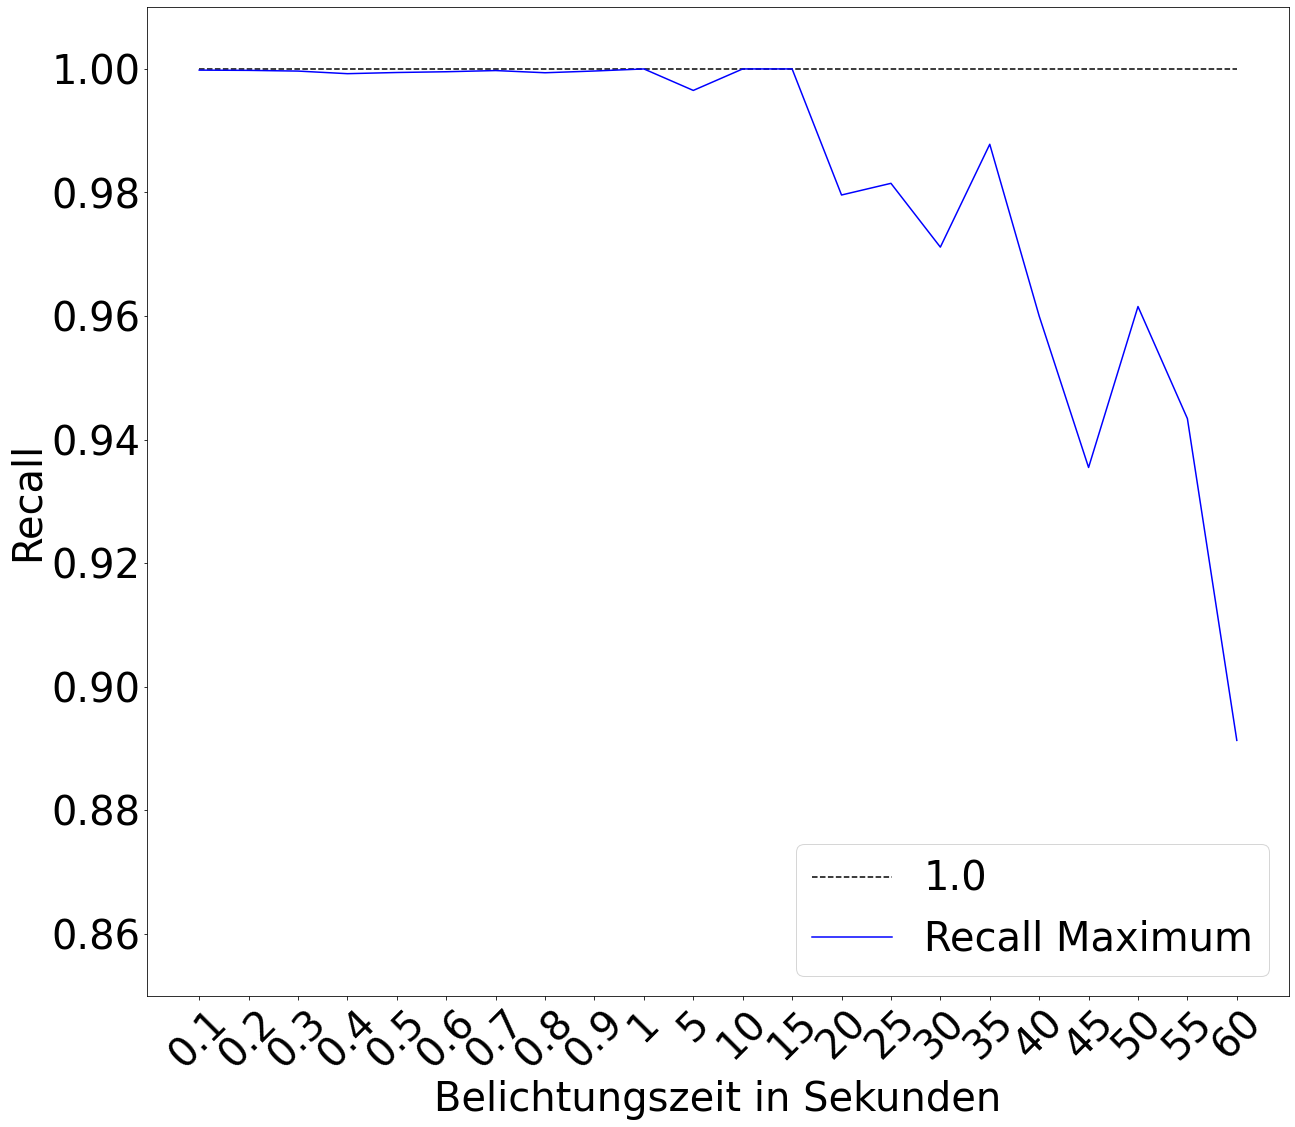

In [12]:

import numpy as np
import pandas as pd
from pickle import *
import sys
import os

from matplotlib import pyplot as plt


def load_pkl(target_path):
  df = pd.read_pickle(target_path)

#needed for debuging
  # df.plot(figsize=(8,5))
  # plt.show()
  return df



def sort(lst):

  lst.sort(key = str)
  return lst


#function needed to prepare plot from multiple histories:
#it returns a numpy shape of format:
#
def connect_histories(path, metric_name_in_df):

    np_current = None

    flag_first = 1

    counter = 0

    list_of_paths = os.listdir(path)

    new_list = [item for item in list_of_paths if (".pkl" in item)]

    sorted_files = sorted(new_list,key=lambda x: float(x.replace("ROUND_1exposure_time_", "").replace("seconds.pkl", "")))

    # sorted_files = sorted(new_list,key=lambda x: int(os.path.splitext(x)[0]))

    # print(sorted_files)


    for file in sorted_files:



        compl_path = path + file
        print(compl_path)
        counter = counter + 1
        history = load_pkl(compl_path)
        df = history[metric_name_in_df].to_frame() 

        numpy_array_itr_val = df.to_numpy()

        if(flag_first == 1):
          flag_first = 0
          np_current = numpy_array_itr_val

        else:
          np_current = np.concatenate([np_current, numpy_array_itr_val], axis = 1)
          # print((np_current.shape))


    return np_current


def plot_control_line(range, color):

  # print(np.shape(max1))
  ctrl_line = np.ones((22,))

  x_axis = range

  plt.plot(x_axis, ctrl_line, color=color, label="1.0", linestyle='--')

  return plt







def plot_on_plt(plt, numpy_array, metric_name, range, color):

  max1 = np.array(numpy_array.max(axis=0))

  x_axis = range

  # plt.figure(facecolor='white')
  plt.plot(x_axis, max1, color=color, label=metric_name)


  return plt



def plot_one_subplot():

  return 0

#--------------------------------------------running code----------------

PATH_TO_HISTORIES = "/home/robin/Desktop/1experiment1_plotting/histories_only_renamed_in_order/exposure_time/"


# OUT_PATH = str(sys.argv[2])

import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(4, 4)



np_shape_of_histories = connect_histories(PATH_TO_HISTORIES, "val_accuracy")


range1 = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']

range2 = ['1', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60']


compl_range = range1 + range2

# plt.subplots(1) 



fig = plt.figure(figsize=(30, 40))


widthEach = 45
xytickFontsize=40
labelsize=40
legendsize=40
padInch=0.1

np_shape_of_histories_acc = connect_histories(PATH_TO_HISTORIES, "val_accuracy")
np_shape_of_histories_prec = connect_histories(PATH_TO_HISTORIES, "val_precision")
np_shape_of_histories_recall = connect_histories(PATH_TO_HISTORIES, "val_recall")





#----------------------------------------------------------------------------------------------------

max1 = np.array(np_shape_of_histories_acc.max(axis=0))


x = compl_range
y = max1


plt.subplot(gs[:2, :2])
# fig.set_figwidth(widthEach)

# plt.ylim([0.85, 1.01])

# plt.xticks(fontsize=xytickFontsize,  rotation=45)
# plt.yticks(fontsize=xytickFontsize)

# plt.ylabel("Accuracy", fontsize=labelsize)
# #  fontsize=14)
# plt.xlabel("Belichtungszeit in Sekunden", fontsize=labelsize)
# # plt.title("Different Exposure Times")

# ctrl_line = np.ones((22,))

# x_axis = compl_range

# plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')



# plt.plot(x,y, label="Accuracy Maximum", color="red")
# plt.legend(loc="lower right",  prop={'size': legendsize})



#----------------------------------------------------------------------------------------------------

# plt.subplot(gs[:2, 2:])
# fig.set_figwidth(widthEach)
# max2 = np.array(np_shape_of_histories_prec.max(axis=0))


# x = compl_range
# y = max2


# plt.ylim([0.85, 1.01])

# plt.xticks(fontsize=xytickFontsize, rotation=45)
# plt.yticks(fontsize=xytickFontsize)

# plt.ylabel("Precision", fontsize=labelsize)
# #  fontsize=14)
# plt.xlabel("Belichtungszeit in Sekunden", fontsize=labelsize)
# # plt.title("Different Exposure Times")

# ctrl_line = np.ones((22,))

# x_axis = compl_range

# plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')



# plt.plot(x,y, label="Precision Maximum", color="Green")

# plt.legend(loc="lower right",  prop={'size': legendsize})

#----------------------------------------------------------------------------------------------------


# plt.subplot(gs[2:4, 1:3])
# plt.subplot(gs[:2, 2:])
fig.set_figwidth(widthEach)
max3 = np.array(np_shape_of_histories_recall.max(axis=0))


x = compl_range
y = max3


plt.ylim([0.85, 1.01])

plt.xticks(fontsize=xytickFontsize,  rotation=45)
plt.yticks(fontsize=xytickFontsize)

plt.ylabel("Recall", fontsize=labelsize)
#  fontsize=14)
plt.xlabel("Belichtungszeit in Sekunden", fontsize=labelsize)
# plt.title("Different Exposure Times")

ctrl_line = np.ones((22,))

x_axis = compl_range

plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')

plt.plot(x,y, label="Recall Maximum", color="Blue")
plt.legend(loc="lower right",  prop={'size': legendsize})


fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)



plt.savefig(str(PATH_TO_HISTORIES) + "exp_time_plots.png", bbox_inches="tight", pad_inches=padInch, dpi=100)
plt.show()




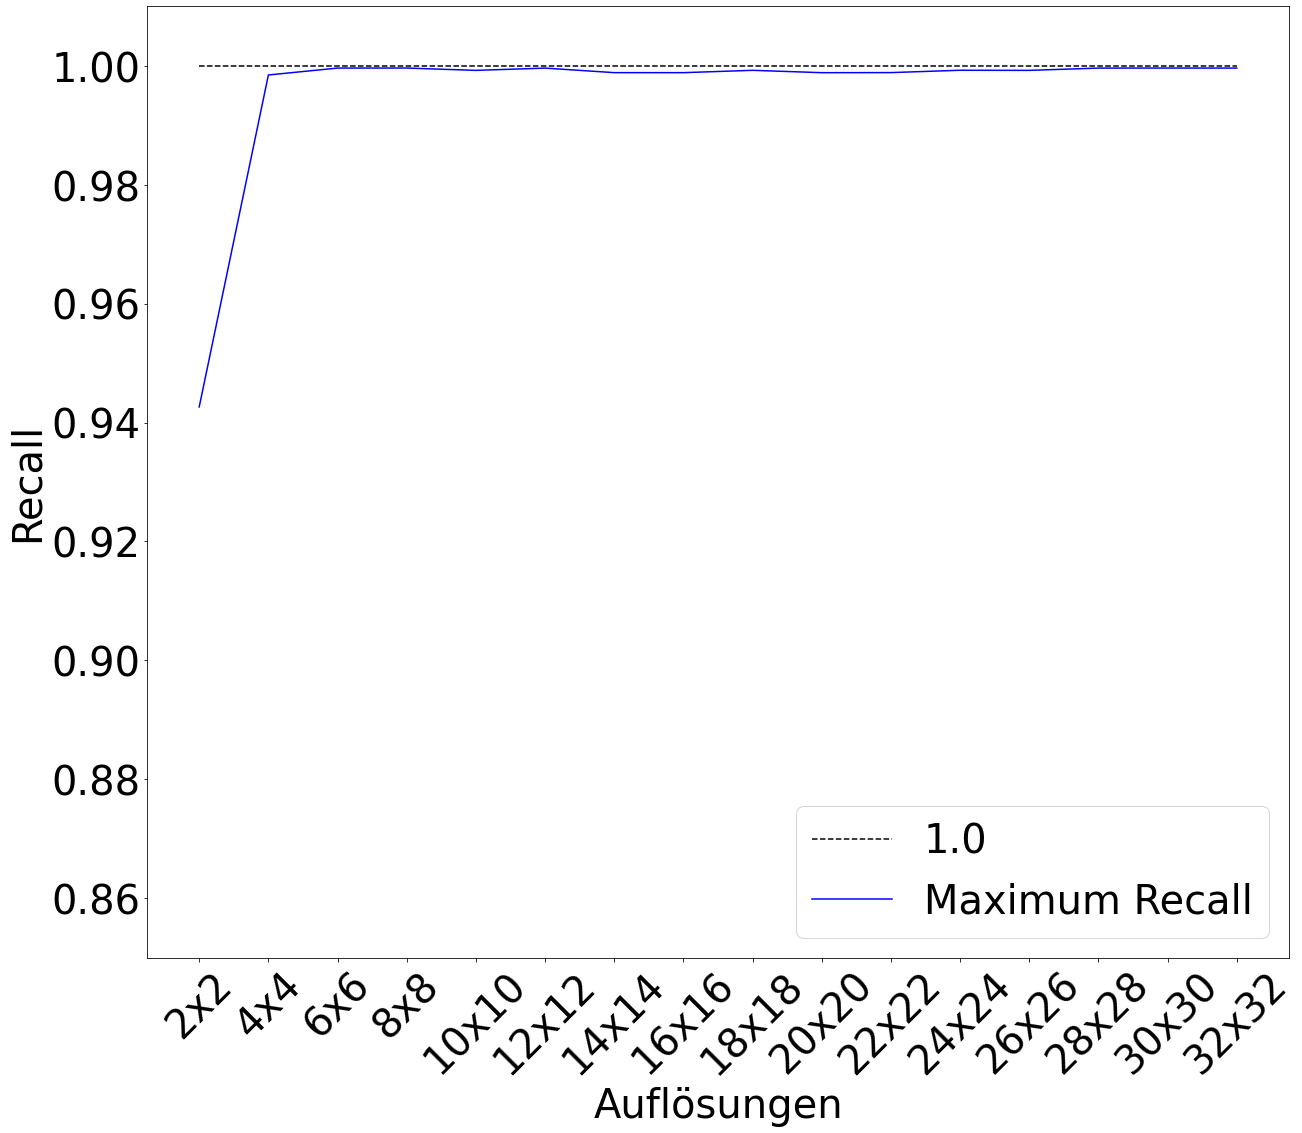

In [15]:

import numpy as np
import pandas as pd
from pickle import *
import sys
import os

from matplotlib import pyplot as plt


def load_pkl(target_path):
  df = pd.read_pickle(target_path)

#needed for debuging
  # df.plot(figsize=(8,5))
  # plt.show()
  return df



def sort(lst):

  lst.sort(key = str)
  return lst


#function needed to prepare plot from multiple histories:
#it returns a numpy shape of format:
#
def connect_histories(path, metric_name_in_df):

    np_current = None

    flag_first = 1

    counter = 0

    list_of_paths = os.listdir(path)

    new_list = [item for item in list_of_paths if (".pkl" in item)]


    


    sorted_files = sorted(new_list,key=lambda x: int(x.replace("ROUND_1", "").replace(".pkl","")))

    # sorted_files = sorted(new_list,key=lambda x: int(os.path.splitext(x)[0]))

    # print(sorted_files)


    for file in sorted_files:



        compl_path = path + file
        # print(compl_path)
        counter = counter + 1
        history = load_pkl(compl_path)
        df = history[metric_name_in_df].to_frame() 

        numpy_array_itr_val = df.to_numpy()

        if(flag_first == 1):
          flag_first = 0
          np_current = numpy_array_itr_val

        else:
          np_current = np.concatenate([np_current, numpy_array_itr_val], axis = 1)
          # print((np_current.shape))


    return np_current


def plot_control_line(range, color):

  # print(np.shape(max1))
  ctrl_line = np.ones((22,))

  x_axis = range

  plt.plot(x_axis, ctrl_line, color=color, label="1.0", linestyle='--')

  return plt







def plot_on_plt(plt, numpy_array, metric_name, range, color):

  max1 = np.array(numpy_array.max(axis=0))

  x_axis = range

  # plt.figure(facecolor='white')
  plt.plot(x_axis, max1, color=color, label=metric_name)


  return plt



def plot_one_subplot():

  return 0

#--------------------------------------------running code----------------

PATH_TO_HISTORIES = "/home/robin/Desktop/1experiment1_plotting/histories_only_renamed_in_order/resolution/"








np_shape_of_histories = connect_histories(PATH_TO_HISTORIES, "val_accuracy")


range1 = ["2x2", "4x4", "6x6",
 "8x8", "10x10", "12x12", 
 "14x14", "16x16", "18x18", 
 "20x20", "22x22", "24x24", 
 "26x26", "28x28", "30x30", 
 "32x32"]


compl_range = range1

# plt.subplots(1)


np_shape_of_histories_acc = connect_histories(PATH_TO_HISTORIES, "val_accuracy")
np_shape_of_histories_prec = connect_histories(PATH_TO_HISTORIES, "val_precision")
np_shape_of_histories_recall = connect_histories(PATH_TO_HISTORIES, "val_recall")



import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(4, 4)

fig = plt.figure(figsize=(30, 40))

#for 3 plots
widthEach = 45
xytickFontsize=40
labelsize=40
legendsize=40


#----------------------------------------------------------------------------------------------------

# max1 = np.array(np_shape_of_histories_acc.max(axis=0))
# fig.set_figwidth(widthEach)

# x = compl_range
# y = max1


# plt.subplot(gs[:2, :2])

# plt.ylim([0.7, 1.01])

# plt.xticks(fontsize=xytickFontsize, rotation =45)
# plt.yticks(fontsize=xytickFontsize)

# plt.ylabel("Accuracy", fontsize=labelsize)
# #  fontsize=14)
# plt.xlabel("Resolutions", fontsize=labelsize)
# # plt.title("Different Exposure Times")

# ctrl_line = np.ones((16,))

# x_axis = compl_range

# plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')



# plt.plot(x,y, label="Maximum Accuracy", color="red")
# plt.legend(loc="lower right", prop={'size': legendsize})



# #----------------------------------------------------------------------------------------------------

# plt.subplot(gs[:2, 2:])
# fig.set_figwidth(widthEach)
# max2 = np.array(np_shape_of_histories_prec.max(axis=0))


# x = compl_range
# y = max2


# plt.ylim([0.7, 1.01])

# plt.xticks(fontsize=xytickFontsize, rotation =45)
# plt.yticks(fontsize=xytickFontsize)

# plt.ylabel("Precision", fontsize=labelsize)
# #  fontsize=14)
# plt.xlabel("Resolutions", fontsize=labelsize)
# # plt.title("Different Exposure Times")

# ctrl_line = np.ones((16,))

# x_axis = compl_range

# plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')



# plt.plot(x,y, label="Maximum Precision", color="Green")

# plt.legend(loc="lower right", prop={'size': legendsize})

#----------------------------------------------------------------------------------------------------

plt.subplot(gs[:2, :2])
# plt.subplot(gs[2:4, 1:3])
fig.set_figwidth(widthEach)
max3 = np.array(np_shape_of_histories_recall.max(axis=0))


x = compl_range
y = max3


plt.ylim([0.85, 1.01])

plt.xticks(fontsize=xytickFontsize, rotation =45)
plt.yticks(fontsize=xytickFontsize)

plt.ylabel("Recall", fontsize=labelsize)
#  fontsize=14)
plt.xlabel("Auflösungen", fontsize=labelsize)
# plt.title("Different Exposure Times")

ctrl_line = np.ones((16,))

x_axis = compl_range

plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')

plt.plot(x,y, label="Maximum Recall", color="Blue")
plt.legend(loc="lower right", prop={'size': legendsize})

fig.subplots_adjust(hspace=0.8)
fig.subplots_adjust(wspace=0.5)
plt.savefig(str(PATH_TO_HISTORIES) + "perfMetrics.png", bbox_inches="tight", pad_inches=0.1, dpi=100)

plt.show()



AxisError: axis 1 is out of bounds for array of dimension 0

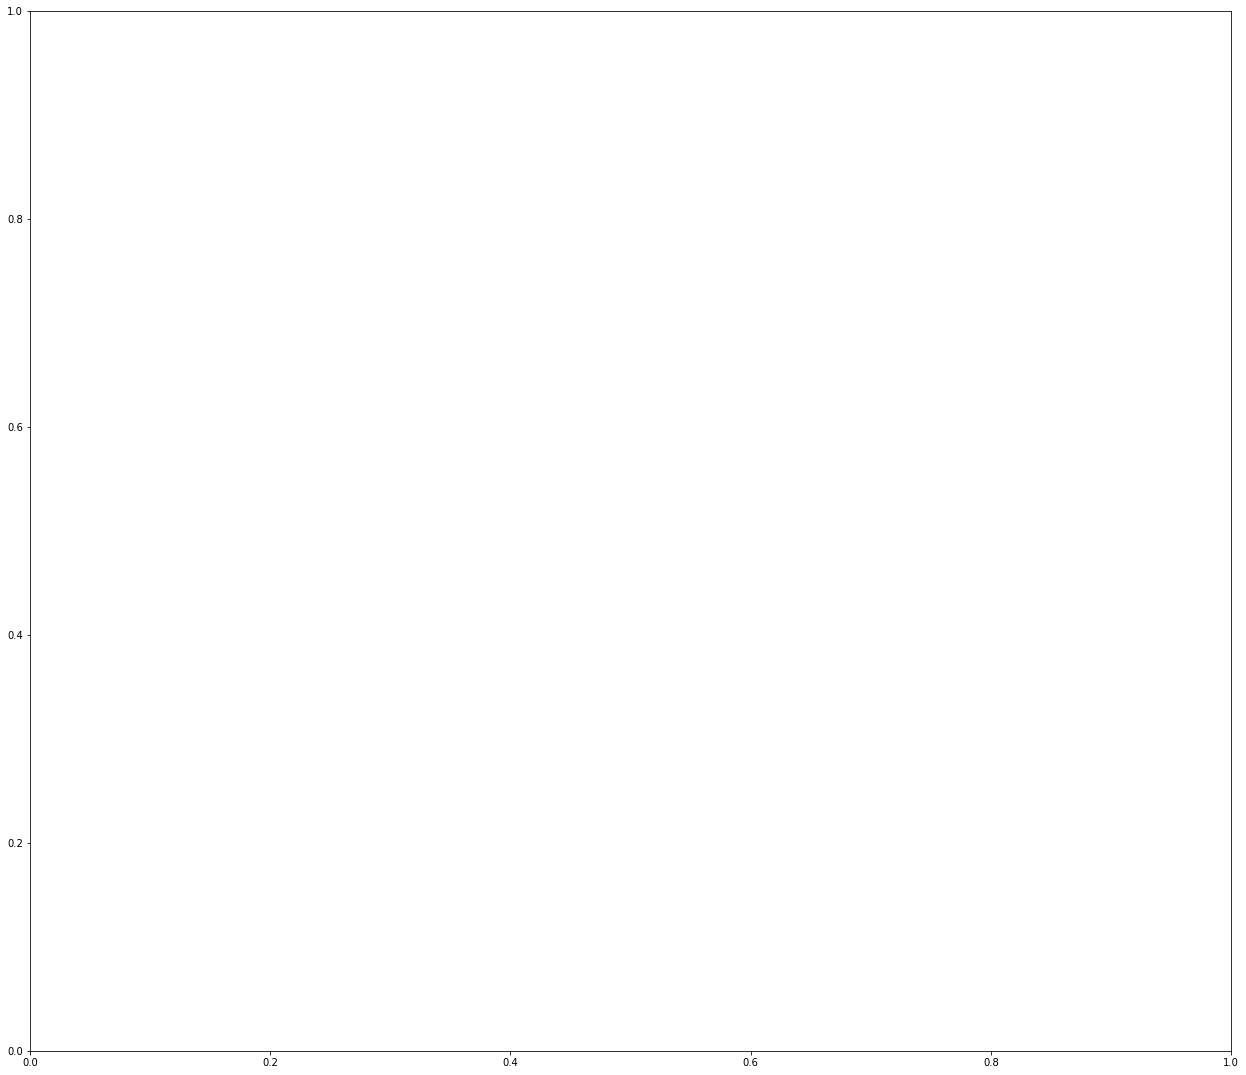

In [1]:

import numpy as np
import pandas as pd
from pickle import *
import sys
import os

from matplotlib import pyplot as plt


def load_pkl(target_path):
  df = pd.read_pickle(target_path)

#needed for debuging
  # df.plot(figsize=(8,5))
  # plt.show()
  return df

def connect_histories(path, metric_name_in_df):

    np_current = None

    flag_first = 1

    counter = 0
 

    for root, directories, file in os.walk(path):


        for file in file:

            if(file.endswith(".pkl")):
                # print(os.path.join(root,file))
                path = os.path.join(root,file)
                #order does not matter.
                counter = counter + 1

                # print("debug loading pkl")
                history = load_pkl(path)

                #a column is imported as a series logic below forces dataframes!
                df = history[metric_name_in_df].to_frame()               

                numpy_array_itr_val = df.to_numpy()

                if(flag_first == 1):
                    flag_first = 0
                    np_current = numpy_array_itr_val

                else:

                    np_current = np.concatenate([np_current, numpy_array_itr_val], axis = 1)
                    # print((np_current.shape))

    # print("finished loop----------------------")

    #     #need epochs,learning_runs
    # print(np_current.shape)

    # print("Found : " + str(counter) + " histories")


    return np_current


#function is needed to calculate mean min and max of each epoch 

#input a sequence of histories where the shape of inputs is each column one history
#input 1: format is a numpy shape with epochs as each row
#input 2: epochs
def write_graph_validation_acc_over_epochs(numpy_array, epochs, out_path, metric_name):

  median = np.array(np.median(numpy_array, axis=1))
  min1 = np.array(numpy_array.min(axis=1))
  max1 = np.array(numpy_array.max(axis=1))

  x_axis = np.arange(0,epochs)


  fig, ax = plt.subplots(1)

  if(not(("FP" in metric_name) or ("FN" in metric_name))):
    ax.set_ylim([0, 1])

  ax.plot(x_axis, median, lw=2, label=metric_name + "_median", color='blue')
  ax.fill_between(x_axis, min1, max1, facecolor='blue', alpha=0.4)

  ax.set_title('Median of ' + metric_name.upper() + " over " + str(epochs) + " epochs")
  ax.legend(loc='lower right')
  ax.set_xlabel('epochs')
  ax.set_ylabel(metric_name.replace("val_", ""))

  out_path_name = out_path + "median_over_epochs_" + metric_name + ".jpg"

  plt.savefig(out_path_name)
  plt.show() 



# config: 

import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(4, 4)

fig = plt.figure(figsize=(30, 40))


all_ylim=[0.5, 1.01]

widthEach = 45
xytickFontsize=40
labelsize=40 
legendsize=40


#--------------------------------------------running code----------------

PATH_TO_HISTORIES = str(sys.argv[1])

plt.subplot(gs[:2, :2])
fig.set_figwidth(widthEach)

np_shape_of_histories = connect_histories(PATH_TO_HISTORIES, "val_accuracy")

median = np.array(np.median(np_shape_of_histories, axis=1))
min1 = np.array(np_shape_of_histories.min(axis=1))
max1 = np.array(np_shape_of_histories.max(axis=1))

x_axis = np.arange(0,100)


# fig, ax = plt.subplots(1)

# if(not(("FP" in metric_name) or ("FN" in metric_name))):
#   ax.set_ylim([0, 1])

plt.ylim(all_ylim)
plt.xticks(fontsize=xytickFontsize)
plt.yticks(fontsize=xytickFontsize)

plt.plot(x_axis, median, lw=2, label="Accuracy Median", color='red')
plt.fill_between(x_axis, min1, max1, facecolor='red', label="Min/Max Accuracy Shading", alpha=0.4)

ctrl_line = np.ones((100,))
plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')

# ax.set_title('Median of ' + metric_name.upper() + " over " + str(epochs) + " epochs")
plt.legend(loc='lower right', prop={'size': legendsize})
plt.xlabel('Epochs', fontsize=labelsize)
plt.ylabel("Accuracy", fontsize=labelsize)

#----------------------------------------------------------------------------------------------------



plt.subplot(gs[:2, 2:])
fig.set_figwidth(widthEach)

np_shape_of_histories = connect_histories(PATH_TO_HISTORIES, "val_precision")

median = np.array(np.median(np_shape_of_histories, axis=1))
min1 = np.array(np_shape_of_histories.min(axis=1))
max1 = np.array(np_shape_of_histories.max(axis=1))

print(min1.min())

x_axis = np.arange(0,100)

plt.ylim(all_ylim)
plt.xticks(fontsize=xytickFontsize)
plt.yticks(fontsize=xytickFontsize)

plt.plot(x_axis, median, lw=2, label="Precision Median", color='green')
plt.fill_between(x_axis, min1, max1, facecolor='green', label="Min/Max Precision Shading", alpha=0.4)

ctrl_line = np.ones((100,))
plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')

# ax.set_title('Median of ' + metric_name.upper() + " over " + str(epochs) + " epochs")
plt.legend(loc='lower right',  prop={'size': legendsize})
plt.xlabel('Epochs', fontsize=labelsize)
plt.ylabel("Precision", fontsize=labelsize)

#----------------------------------------------------------------------------------------------------


plt.subplot(gs[2:4, 1:3])
fig.set_figwidth(widthEach)

np_shape_of_histories = connect_histories(PATH_TO_HISTORIES, "val_recall")

median = np.array(np.median(np_shape_of_histories, axis=1))
min1 = np.array(np_shape_of_histories.min(axis=1))
max1 = np.array(np_shape_of_histories.max(axis=1))

x_axis = np.arange(0,100)

plt.ylim(all_ylim)
plt.xticks(fontsize=xytickFontsize)
plt.yticks(fontsize=xytickFontsize)

plt.plot(x_axis, median, lw=2, label="Recall Median", color='blue')
plt.fill_between(x_axis, min1, max1, facecolor='blue', label="Min/Max Recall Shading", alpha=0.4)

ctrl_line = np.ones((100,))
plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')

# ax.set_title('Median of ' + metric_name.upper() + " over " + str(epochs) + " epochs")
plt.legend(loc='lower right',  prop={'size': legendsize})
plt.xlabel('Epochs', fontsize=labelsize)
plt.ylabel("Recall", fontsize=labelsize)

#----------------------------------------------------------------------------------------------------


fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)

plt.savefig(PATH_TO_HISTORIES + "metric_plot.png", bbox_inches='tight')

plt.show() 


np_shape_of_histories = connect_histories(PATH_TO_HISTORIES, "val_accuracy")


max = np.array(np.max(np_shape_of_histories, axis=0)).max()

print("max accuracy validation")
print(max)

np_shape_of_histories = connect_histories(PATH_TO_HISTORIES, "val_recall")

max = np.array(np.max(np_shape_of_histories, axis=0)).max()


print(max)

min = np.array(np.max(np_shape_of_histories, axis=0)).min()
print("min recall validation")
print(min)


np_shape_of_histories = connect_histories(PATH_TO_HISTORIES, "val_precision")

max = np.array(np.max(np_shape_of_histories, axis=0)).max()

print("max precision validation")
print(max)





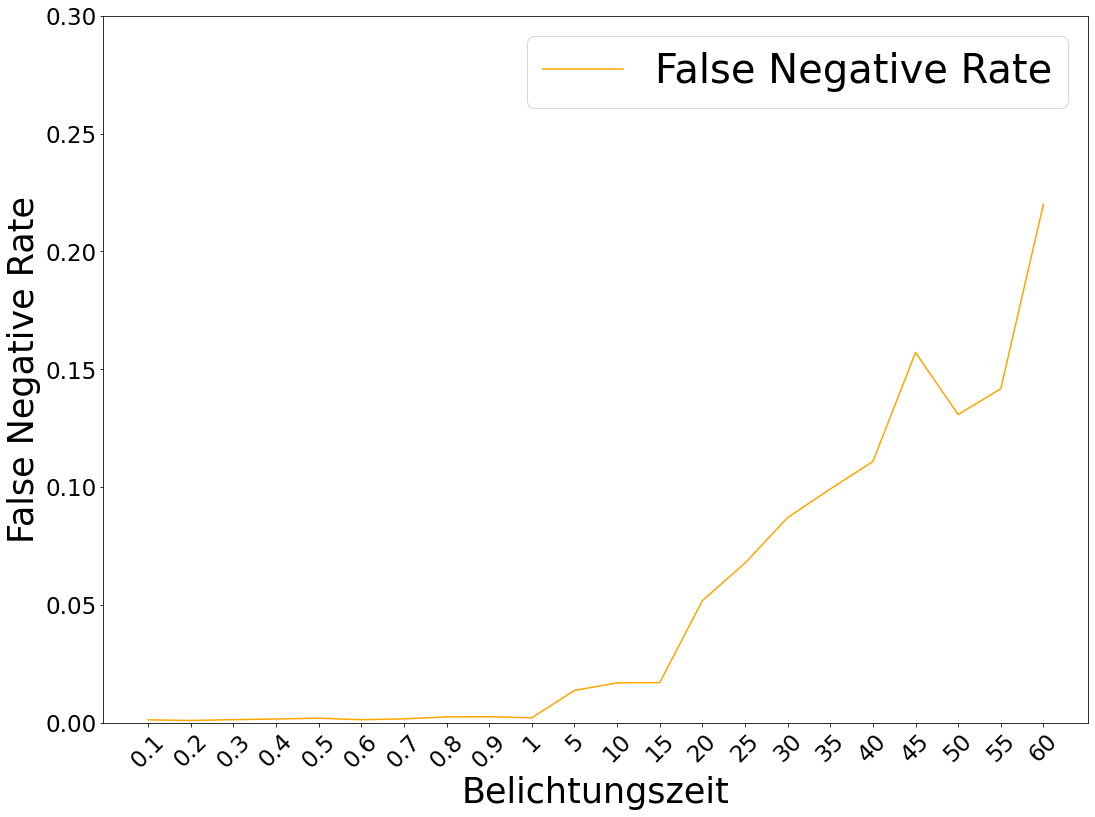

In [3]:

import numpy as np
import pandas as pd
from pickle import *
import sys
import os

from matplotlib import pyplot as plt


def load_pkl(target_path):
  df = pd.read_pickle(target_path)

#needed for debuging
  # df.plot(figsize=(8,5))
  # plt.show()
  return df



def sort(lst):

  lst.sort(key = str)
  return lst


#function needed to prepare plot from multiple histories:
#it returns a numpy shape of format:
#
def connect_histories(path, metric_name_in_df):

    np_current = None

    flag_first = 1

    counter = 0

    list_of_paths = os.listdir(path)

    new_list = [item for item in list_of_paths if (".pkl" in item)]

    sorted_files = sorted(new_list,key=lambda x: float(x.replace("ROUND_1exposure_time_", "").replace("seconds.pkl", "")))


    for file in sorted_files:



        compl_path = path + file
        # print(compl_path)
        counter = counter + 1
        history = load_pkl(compl_path)
        df = history[metric_name_in_df].to_frame() 

        numpy_array_itr_val = df.to_numpy()

        if(flag_first == 1):
          flag_first = 0
          np_current = numpy_array_itr_val

        else:
          np_current = np.concatenate([np_current, numpy_array_itr_val], axis = 1)
          # print((np_current.shape))


    return np_current



def plot_on_plt(plt, numpy_array, metric_name, range, color):

  max1 = np.array(numpy_array.max(axis=0))

  x_axis = range

  # plt.figure(facecolor='white')
  plt.plot(x_axis, max1, color=color, label=metric_name)


  return plt



def plot_one_subplot():

  return 0

#--------------------------------------------running code----------------

PATH_TO_HISTORIES = "/home/robin/Desktop/1experiment1_plotting/histories_only_renamed_in_order/exposure_time/"


# OUT_PATH = str(sys.argv[2])





np_shape_of_histories = connect_histories(PATH_TO_HISTORIES, "val_accuracy")


range1 = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']

range2 = ['1', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60']


compl_range = range1 + range2



np_shape_of_histories_tp = connect_histories(PATH_TO_HISTORIES, "val_TP")
np_shape_of_histories_tn = connect_histories(PATH_TO_HISTORIES, "val_TN")
np_shape_of_histories_fp = connect_histories(PATH_TO_HISTORIES, "val_FP")
np_shape_of_histories_fn = connect_histories(PATH_TO_HISTORIES, "val_FN")
# np_shape_of_histories_recall = connect_histories(PATH_TO_HISTORIES, "val_recall")




# # , marker="*"


#----------------------------------------------------------------------------------------------------

#mean over all epochs
# max1 = np.array(np_shape_of_histories_fn.max(axis=0))

# print(np_shape_of_histories_fn.shape)

# print(max1.shape)
# print(max1[1])

#FNR = FN / FN + TP
def calc_fnr(np_shape_fn, np_shape_tp , xticks, epochs):

  new_array = []

  for j in range(xticks):

    column_list = []

    for i in range(epochs):

      fn_val_in_epoch_i_at_exp_t_j = np_shape_fn[i][j]
      tp_val_in_epoch_i_at_exp_t_j = np_shape_tp[i][j]

      column_list.append(fn_val_in_epoch_i_at_exp_t_j / (fn_val_in_epoch_i_at_exp_t_j + tp_val_in_epoch_i_at_exp_t_j))

    new_array.append(column_list)

  fnr = np.array(np.array(new_array).mean(axis=1))


  return fnr

#FPR = FP / FP + TN
def calc_fpr(np_shape_fp, np_shape_tn , xticks, epochs):

  new_array = []

  for j in range(xticks):

    column_list = []

    for i in range(epochs):

      fp_val_in_epoch_i_at_exp_t_j = np_shape_fp[i][j]
      tn_val_in_epoch_i_at_exp_t_j = np_shape_tn[i][j]

      column_list.append(fp_val_in_epoch_i_at_exp_t_j / (fp_val_in_epoch_i_at_exp_t_j + tn_val_in_epoch_i_at_exp_t_j))

    new_array.append(column_list)

  fpr = np.array(np.array(new_array).mean(axis=1))


  return fpr



fig = plt.figure(figsize=(20, 13))

#for 2 plots
widthEach = 60
xytickFontsize=23
labelsize=35
legendsize=40
pad_inches=0.1

x = compl_range
y = calc_fnr(np_shape_of_histories_fn, np_shape_of_histories_tp, 22, 100)


plt.subplot(1, 3, 1)

fig.set_figwidth(widthEach)


plt.ylim([0, 0.3])

plt.xticks(fontsize=23, rotation=45)
plt.yticks(fontsize=23)

plt.ylabel("False Negative Rate", fontsize=labelsize)
#  fontsize=14)
plt.xlabel("Belichtungszeit", fontsize=labelsize)
# plt.title("Different Exposure Times")

# ctrl_line = np.ones((22,))

# x_axis = compl_range

# plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')




plt.plot(x,y, label="False Negative Rate", color="orange")

plt.legend(loc="upper right", prop={'size': legendsize})


#----------------------------------------------------------------------------------------------------


# plt.subplot(1, 3, 2)

# fig.set_figwidth(widthEach)

# x = compl_range
# y = calc_fpr(np_shape_of_histories_fp, np_shape_of_histories_tn, 22, 100)


# plt.ylim([0, 0.3])

# plt.xticks(fontsize=23, rotation=45)
# plt.yticks(fontsize=23)

# plt.ylabel("False Positive Rate", fontsize=labelsize)
# #  fontsize=14)
# plt.xlabel("Exposure Times in Seconds", fontsize=labelsize)




# plt.plot(x,y, label="False Positive Rate", color="red")

# plt.legend(loc="upper right", prop={'size': legendsize})


#----------------------------------------------------------------------------------------------------


plt.savefig(str(PATH_TO_HISTORIES) + "exp_time_plotsRATES.png",pad_inches=pad_inches, bbox_inches="tight", dpi=100)
# plt.savefig(str(OUT_PATH))

plt.show()



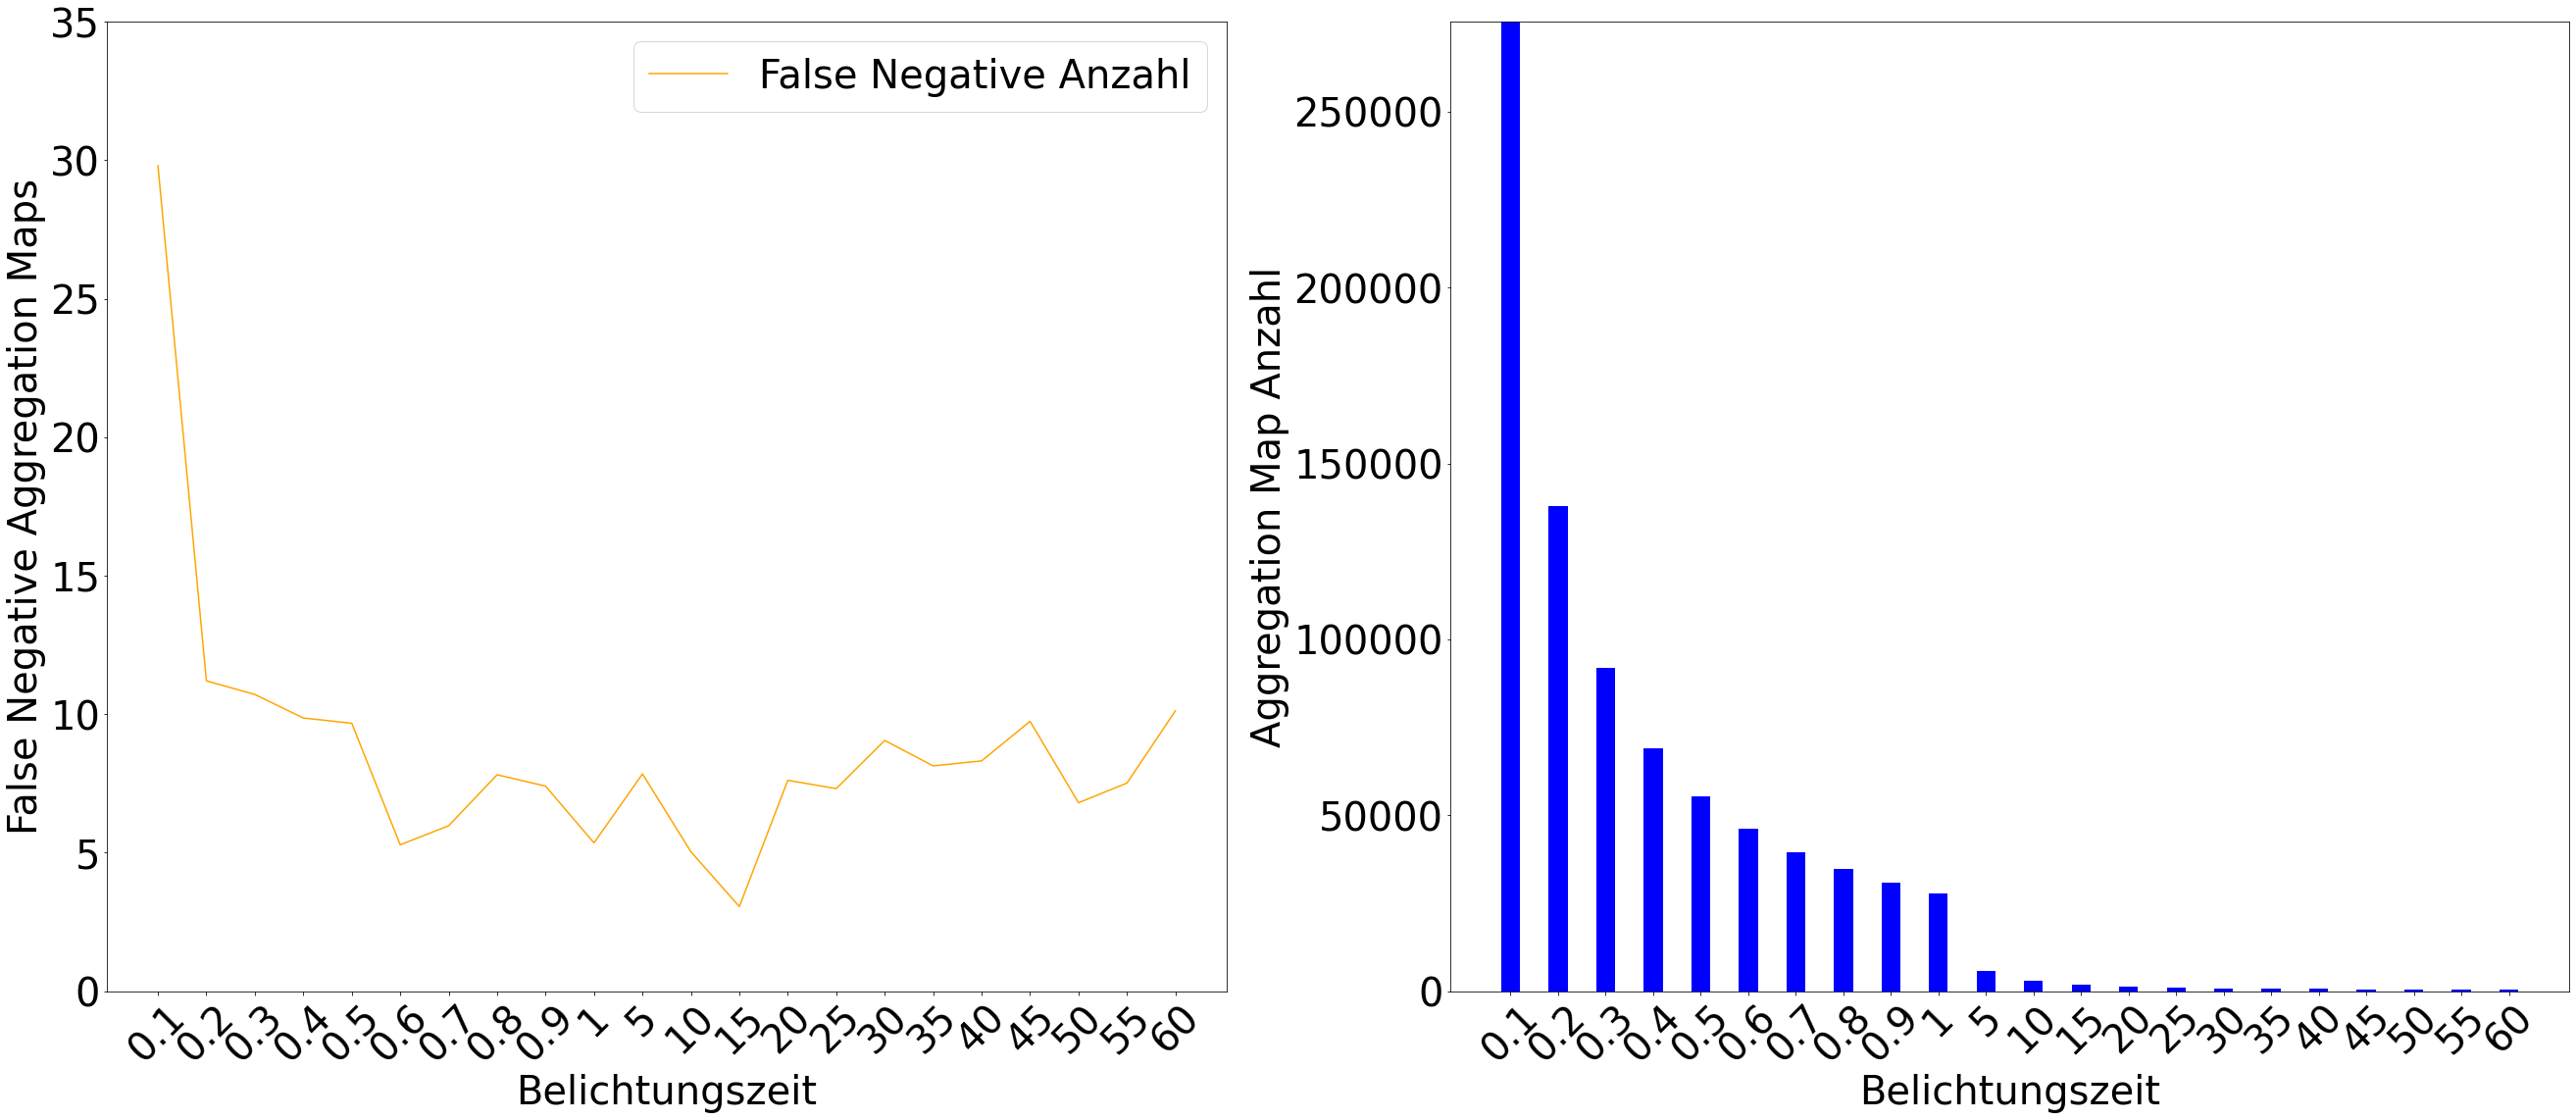

In [10]:

import numpy as np
import pandas as pd
from pickle import *
import sys
import os

from matplotlib import pyplot as plt


def load_pkl(target_path):
  df = pd.read_pickle(target_path)

#needed for debuging
  # df.plot(figsize=(8,5))
  # plt.show()
  return df



def sort(lst):

  lst.sort(key = str)
  return lst


#function needed to prepare plot from multiple histories:
#it returns a numpy shape of format:
#
def connect_histories(path, metric_name_in_df):

    np_current = None

    flag_first = 1

    counter = 0

    list_of_paths = os.listdir(path)

    new_list = [item for item in list_of_paths if (".pkl" in item)]

    sorted_files = sorted(new_list,key=lambda x: float(x.replace("ROUND_1exposure_time_", "").replace("seconds.pkl", "")))


    # print(sorted_files)


    for file in sorted_files:



        compl_path = path + file
        # print(compl_path)
        counter = counter + 1
        history = load_pkl(compl_path)
        df = history[metric_name_in_df].to_frame() 

        numpy_array_itr_val = df.to_numpy()

        if(flag_first == 1):
          flag_first = 0
          np_current = numpy_array_itr_val

        else:
          np_current = np.concatenate([np_current, numpy_array_itr_val], axis = 1)
          # print((np_current.shape))


    return np_current



# def plot_control_line(range, color):

#   # print(np.shape(max1))
#   ctrl_line = np.ones((22,))

#   x_axis = range

#   plt.plot(x_axis, ctrl_line, color=color, label="1.0", linestyle='--')

#   return plt


def plot_on_plt(plt, numpy_array, metric_name, range, color):

  max1 = np.array(numpy_array.max(axis=0))

  x_axis = range

  # plt.figure(facecolor='white')
  plt.plot(x_axis, max1, color=color, label=metric_name)


  return plt



def plot_one_subplot():

  return 0

#--------------------------------------------running code----------------

PATH_TO_HISTORIES = "/home/robin/Desktop/1experiment1_plotting/histories_only_renamed_in_order/exposure_time/"




range1 = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']

range2 = ['1', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60']


compl_range = range1 + range2


import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(4, 4)

fig = plt.figure(figsize=(30, 40))


widthEach = 45
xytickFontsize=40
labelsize=40
legendsize=40
pad_inches=0.1


np_shape_of_histories_fp = connect_histories(PATH_TO_HISTORIES, "val_FP")
np_shape_of_histories_fn = connect_histories(PATH_TO_HISTORIES, "val_FN")
# np_shape_of_histories_recall = connect_histories(PATH_TO_HISTORIES, "val_recall")




# # , marker="*"


#----------------------------------------------------------------------------------------------------

max1 = np.array(np_shape_of_histories_fn.mean(axis=0))


x = compl_range
y = max1


plt.subplot(gs[:2, :2])


fig.set_figwidth(widthEach)

plt.ylim([0, 35])

plt.xticks(fontsize=xytickFontsize, rotation=45)
plt.yticks(fontsize=xytickFontsize)

plt.ylabel("False Negative Aggregation Maps", fontsize=labelsize)
#  fontsize=14)
plt.xlabel("Belichtungszeit", fontsize=labelsize)
# plt.title("Different Exposure Times")

# ctrl_line = np.ones((22,))

# x_axis = compl_range

# plt.plot(x_axis, ctrl_line, color="black", label="1.0", linestyle='--')



plt.plot(x,y, label="False Negative Anzahl", color="orange")
plt.legend(loc="upper right", prop={'size': legendsize})



#----------------------------------------------------------------------------------------------------

plt.subplot(gs[:2, 2:])

# fig.set_figwidth(widthEach)

# max2 = np.array(np_shape_of_histories_fp.mean(axis=0))


# x = compl_range
# y = max2


# plt.ylim([0, 35])

# plt.xticks(fontsize=xytickFontsize, rotation=45)
# plt.yticks(fontsize=xytickFontsize)

# plt.ylabel("Total Amount", fontsize=labelsize)
# #  fontsize=14)
# plt.xlabel("Exposure Times in Seconds", fontsize=labelsize)




# plt.plot(x,y, label="False Positive", color="red")

# plt.legend(loc="upper right", prop={'size': legendsize})

#----------------------------------------------------------------------------------------------------



# plt.subplot(gs[2:4, 1:3])

# max2 = np.array(np_shape_of_histories_fp.mean(axis=0))

# splitseconds input data
# [275574, 137890, 92002, 69054, 55284, 46102, 39550, 34636, 30810]

# size = 9 + 13?

split_seconds_sizes = [275574, 137890, 92002, 69054, 55284, 46102, 39550, 34636, 30810]
sec_to_min_sizes = [27748, 5736, 2862, 1818, 1324, 1010, 814, 684, 568, 470, 420, 364, 320]

y_range = split_seconds_sizes + sec_to_min_sizes

max2 = y_range


x = compl_range
y = max2


plt.ylim([0, 275574])

plt.xticks(fontsize=xytickFontsize, rotation=45)
plt.yticks(fontsize=xytickFontsize)

plt.ylabel("Aggregation Map Anzahl", fontsize=labelsize)
#  fontsize=14)
plt.xlabel("Belichtungszeit", fontsize=labelsize)


# # creating the bar plot
# plt.bar(courses, values, color ='maroon',
#         width = 0.4)

plt.bar(x,y, color="blue",label="Balanced Sample Size", width = 0.4)

# plt.plot(x,y, label="FP", color="Red")

# plt.legend(loc="upper right", prop={'size': legendsize})

#----------------------------------------------------------------------------------------------------

fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)


plt.savefig(str(PATH_TO_HISTORIES) + "exp_time_plotsTOTALS.png",pad_inches=pad_inches, bbox_inches="tight", dpi=100)
# plt.savefig(str(OUT_PATH),  bbox_inches="tight")

plt.show()



[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
(1024, 1)
[0 0 0 ... 0 0 0]
label: [1]
Max value:7844
Mean value vector:22.205078125
STD value vecotr:256.8757849242755
reshaping: 
------------------------------------------------------------------------------Original MAP---------------------------------------------------
[[0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
32
32


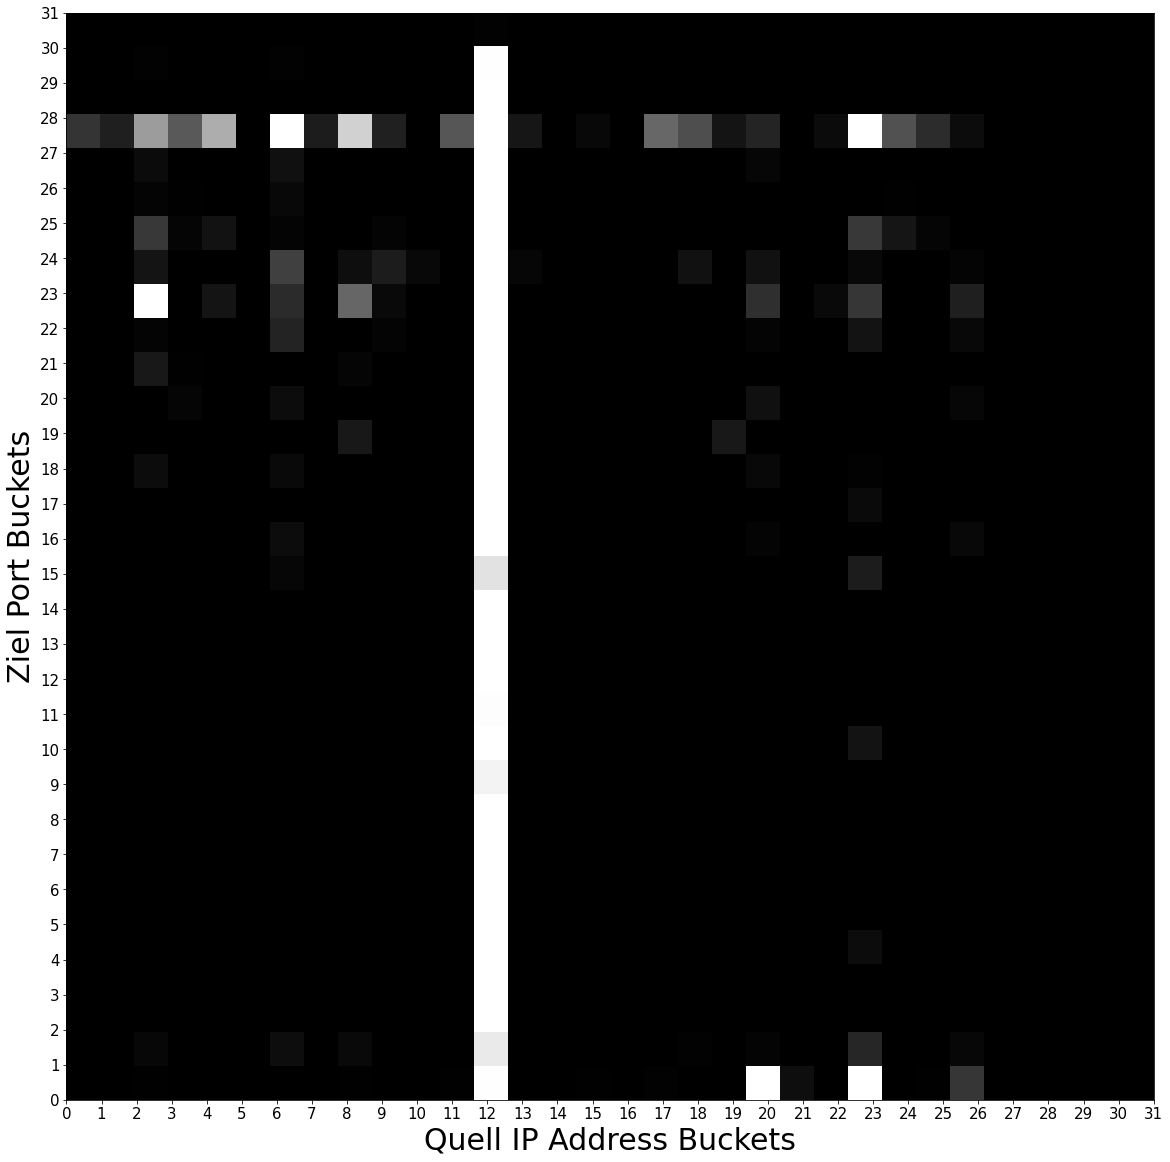

In [23]:
import ipaddress
from Aggregation_Map import *
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scipy.stats as stats


import sys





if(str(sys.argv[1]) == "--help"):
    print("argv1 == PATH_LABELD_TRACE, needs to be csv")



PATH_TO_MAP = "/home/robin/Desktop/exp1_65kports_exposure_time_60seconds/184vector-map-resolution-32-32.csv"

map = pd.read_csv(PATH_TO_MAP, index_col=[0])

map = np.array(map)


label = map[-1]

map = map[:len(map)-1]

# x2 = x2.reshape(32,32,1)

print(map)
print(map.shape)



print(map.reshape(1024,))

original_map_vector = map.reshape(1024,)


print("label: " + str(label))

print("Max value:" + str(original_map_vector.max()))

print("Mean value vector:" + str(original_map_vector.mean()))
print("STD value vecotr:" + str(original_map_vector.std()))

z_score_vector = stats.zscore(original_map_vector)

if (np.nan in z_score_vector): print("WARNING there is a NAN value in the list!")



print("reshaping: ")

orig_map = original_map_vector.reshape(32,32)
z_score_map = z_score_vector.reshape(32,32)




print( "------------------------------------------------------------------------------Original MAP---------------------------------------------------")
print(orig_map,flush=True)

list = []

list.append(orig_map)


def print_save_aggregation_map_list(aggregation_map_list, path=None, bool_show=False, grid_rows=5, grid_colums=5, MAP_DIMENSION_X=32, MAP_DIMENSION_Y=32):


    
    for index in range(len(aggregation_map_list)):

        # iteration_df = unlabeled_trace_dataframe.loc[(unlabeled_trace_dataframe['frame.time_epoch'] >= current_timestamp)  &  (unlabeled_trace_dataframe['frame.time_epoch'] < current_timestamp + time_window)]
        aggr_map = aggregation_map_list[index]

        img_array = aggr_map

        print(len(aggr_map))
        print(len(aggr_map[0]))

        plt.subplot(int(grid_rows), int(grid_colums), index + 1)
        plt.xlabel("Quell IP Address Buckets", fontsize=30)
        plt.ylabel("Ziel Port Buckets", fontsize=30)
        plt.xticks(range(0,32), fontsize=15)
        plt.yticks(range(0,32), fontsize=15)
        # plt.xticks([0,4,8,12,16,20,24,28,32], fontsize=20)
        # plt.yticks(fontsize=20)
        plt.imshow(img_array, cmap='gray', vmin=0, vmax=255,  extent=[0,MAP_DIMENSION_X - 1,0,MAP_DIMENSION_Y - 1])

    figure = plt.gcf()
    figure.set_size_inches((20,20), forward=False)
    if(path is not None):
        figure.savefig(path, format='png')
    
    if(bool_show):
        plt.show()


print_save_aggregation_map_list(list, (PATH_TO_MAP + ".png"), True, 1,1)

In [ ]:
import ipaddress
from Aggregation_Map import *
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scipy.stats as stats


import sys





if(str(sys.argv[1]) == "--help"):
    print("argv1 == PATH_LABELD_TRACE, needs to be csv")



PATH_TO_MAP = "/home/robin/Desktop/exp1_65kports_exposure_time_60seconds/90vector-map-resolution-32-32.csv"

map = pd.read_csv(PATH_TO_MAP, index_col=[0])

map = np.array(map)


label = map[-1]

map = map[:len(map)-1]

# x2 = x2.reshape(32,32,1)

print(map)
print(map.shape)



print(map.reshape(1024,))

original_map_vector = map.reshape(1024,)


print("label: " + str(label))

print("Max value:" + str(original_map_vector.max()))

print("Mean value vector:" + str(original_map_vector.mean()))
print("STD value vecotr:" + str(original_map_vector.std()))

z_score_vector = stats.zscore(original_map_vector)

if (np.nan in z_score_vector): print("WARNING there is a NAN value in the list!")



print("reshaping: ")

orig_map = original_map_vector.reshape(32,32)
z_score_map = z_score_vector.reshape(32,32)




print( "------------------------------------------------------------------------------Original MAP---------------------------------------------------")
print(orig_map,flush=True)

list = []

list.append(orig_map)


def print_save_aggregation_map_list(aggregation_map_list, path=None, bool_show=False, grid_rows=5, grid_colums=5, MAP_DIMENSION_X=32, MAP_DIMENSION_Y=32):


    
    for index in range(len(aggregation_map_list)):

        # iteration_df = unlabeled_trace_dataframe.loc[(unlabeled_trace_dataframe['frame.time_epoch'] >= current_timestamp)  &  (unlabeled_trace_dataframe['frame.time_epoch'] < current_timestamp + time_window)]
        aggr_map = aggregation_map_list[index]

        img_array = aggr_map

        print(len(aggr_map))
        print(len(aggr_map[0]))

        plt.subplot(int(grid_rows), int(grid_colums), index + 1)
        plt.xlabel("Quell IP Address Buckets", fontsize=30)
        plt.ylabel("Ziel Port Buckets", fontsize=30)
        plt.xticks(range(0,32), fontsize=15)
        plt.yticks(range(0,32), fontsize=15)
        # plt.xticks([0,4,8,12,16,20,24,28,32], fontsize=20)
        # plt.yticks(fontsize=20)
        plt.imshow(img_array, cmap='gray', vmin=0, vmax=255,  extent=[0,MAP_DIMENSION_X - 1,0,MAP_DIMENSION_Y - 1])

    figure = plt.gcf()
    figure.set_size_inches((20,20), forward=False)
    if(path is not None):
        figure.savefig(path, format='png')
    
    if(bool_show):
        plt.show()


print_save_aggregation_map_list(list, (PATH_TO_MAP + ".png"), True, 1,1)